**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: Operaciones de Aprendizaje Automático**

Tecnológico de Monterrey

**Fase 1 – Procesamiento y Modelado Inicial**
En esta primera etapa aprenderás a trabajar con los datos y a construir tus primeros modelos:

* Realizar un análisis del problema y generar una propuesta de valor.
* Manipular y preparar datos.
* Explorar y preprocesar información.
* Aplicar técnicas de versionado para asegurar reproducibilidad y trazabilidad.
* Construir, ajustar y evaluar modelos de Machine Learning.

---

**EQUIPO 10**

**ALUMNOS:**

Gabriela Lizeth Moreno Hernández - AXXXXX

Alejandro Chávez Campos  -  AXXXXX

Carlos Armando Alcántar Sánchez - A01311747

Luis Fernando Caporal Montes de Oca  -  A01795898

Yamil Abraham Nechar Reyes - A01795726

In [1]:
# --- Librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
# Configuración de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MLOPs/Semana3/dataset/"
os.chdir(DIR)

**1. Carga de Datos**

In [4]:
# Explicación:
# Se carga el dataset original para explorar la estructura y distribución de atributos.
# Esto permite identificar tipos de variables, su rango de valores y posibles problemas como desbalance o valores faltantes.
data_path = "insurance_company_original.csv"

column_names = [f"A{i}" for i in range(1, 87)]
df = pd.read_csv(data_path, sep=",", header=None, names=column_names)

# Remove the first row
df = df.iloc[1:].copy()

print("Dimensiones del dataset:", df.shape)
print(df)


Dimensiones del dataset: (5821, 86)
      A1  A2  A3  A4  A5  A6  A7   A8   A9  A10  ...  A77  A78  A79  A80  A81  \
1     37   1   2   2   8   1   4  1.0  4.0    6  ...  0.0  0.0  0.0  1.0  0.0   
2     37   1   2   2   8   0   4  2.0  4.0    3  ...  0.0  0.0  0.0  1.0  0.0   
3      9   1   3   3   3   2   3  2.0  4.0    5  ...  0.0  0.0  0.0  1.0  0.0   
4     40   1   4   2  10   1   4  1.0  4.0    7  ...  0.0  0.0  0.0  1.0  0.0   
5     23   1   2   1   5   0   5  0.0  5.0    0  ...  0.0  0.0  0.0  0.0  0.0   
...   ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5817  36   1   1   2   8   0   6  1.0  2.0    1  ...  0.0  0.0  0.0  1.0  0.0   
5818  35   1   4   4   8   1   4  1.0  4.0    6  ...  0.0  0.0  0.0  1.0  0.0   
5819  33   1   3   4   8   0   6  0.0  3.0    5  ...  0.0  0.0  0.0  1.0  0.0   
5820  34   1   3   2   8   0   7  0.0  2.0    7  ...  0.0  0.0  0.0  0.0  0.0   
5821  33   1   3   3   8   0   6  1.0  2.0    7  ...  0.0  0.0  0.0  0.0 

1.1 Información General del Dataset

In [5]:
print("Información general del dataset:")
print(df.info())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5821 entries, 1 to 5821
Data columns (total 86 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      5821 non-null   int64  
 1   A2      5821 non-null   int64  
 2   A3      5821 non-null   int64  
 3   A4      5821 non-null   int64  
 4   A5      5821 non-null   int64  
 5   A6      5821 non-null   int64  
 6   A7      5821 non-null   int64  
 7   A8      5821 non-null   float64
 8   A9      5821 non-null   float64
 9   A10     5821 non-null   int64  
 10  A11     5821 non-null   float64
 11  A12     5821 non-null   float64
 12  A13     5821 non-null   float64
 13  A14     5821 non-null   float64
 14  A15     5821 non-null   int64  
 15  A16     5821 non-null   float64
 16  A17     5821 non-null   float64
 17  A18     5821 non-null   float64
 18  A19     5821 non-null   float64
 19  A20     5821 non-null   float64
 20  A21     5821 non-null   float64
 21  A22 

1.2 Estadisticas descriptivas

In [6]:
print("\nEstadísticas descriptivas:")
print(df.describe(include="all"))


Estadísticas descriptivas:
                A1           A2           A3           A4           A5  \
count  5821.000000  5821.000000  5821.000000  5821.000000  5821.000000   
mean     24.251847     1.110634     2.678749     2.991410     5.773235   
std      12.847298     0.405874     0.789891     0.814555     2.856856   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%      10.000000     1.000000     2.000000     2.000000     3.000000   
50%      30.000000     1.000000     3.000000     3.000000     7.000000   
75%      35.000000     1.000000     3.000000     3.000000     8.000000   
max      41.000000    10.000000     5.000000     6.000000    10.000000   

                A6           A7           A8           A9          A10  ...  \
count  5821.000000  5821.000000  5821.000000  5821.000000  5821.000000  ...   
mean      0.696616     4.626868     1.069919     3.258547     6.183302  ...   
std       1.003278     1.715983     1.017590     1.597780     1.9096

1.3 Valores faltantes

In [7]:
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
A1     0
A2     0
A3     0
A4     0
A5     0
      ..
A82    0
A83    0
A84    0
A85    0
A86    0
Length: 86, dtype: int64


1.4 Distribucion de variablers numéricas

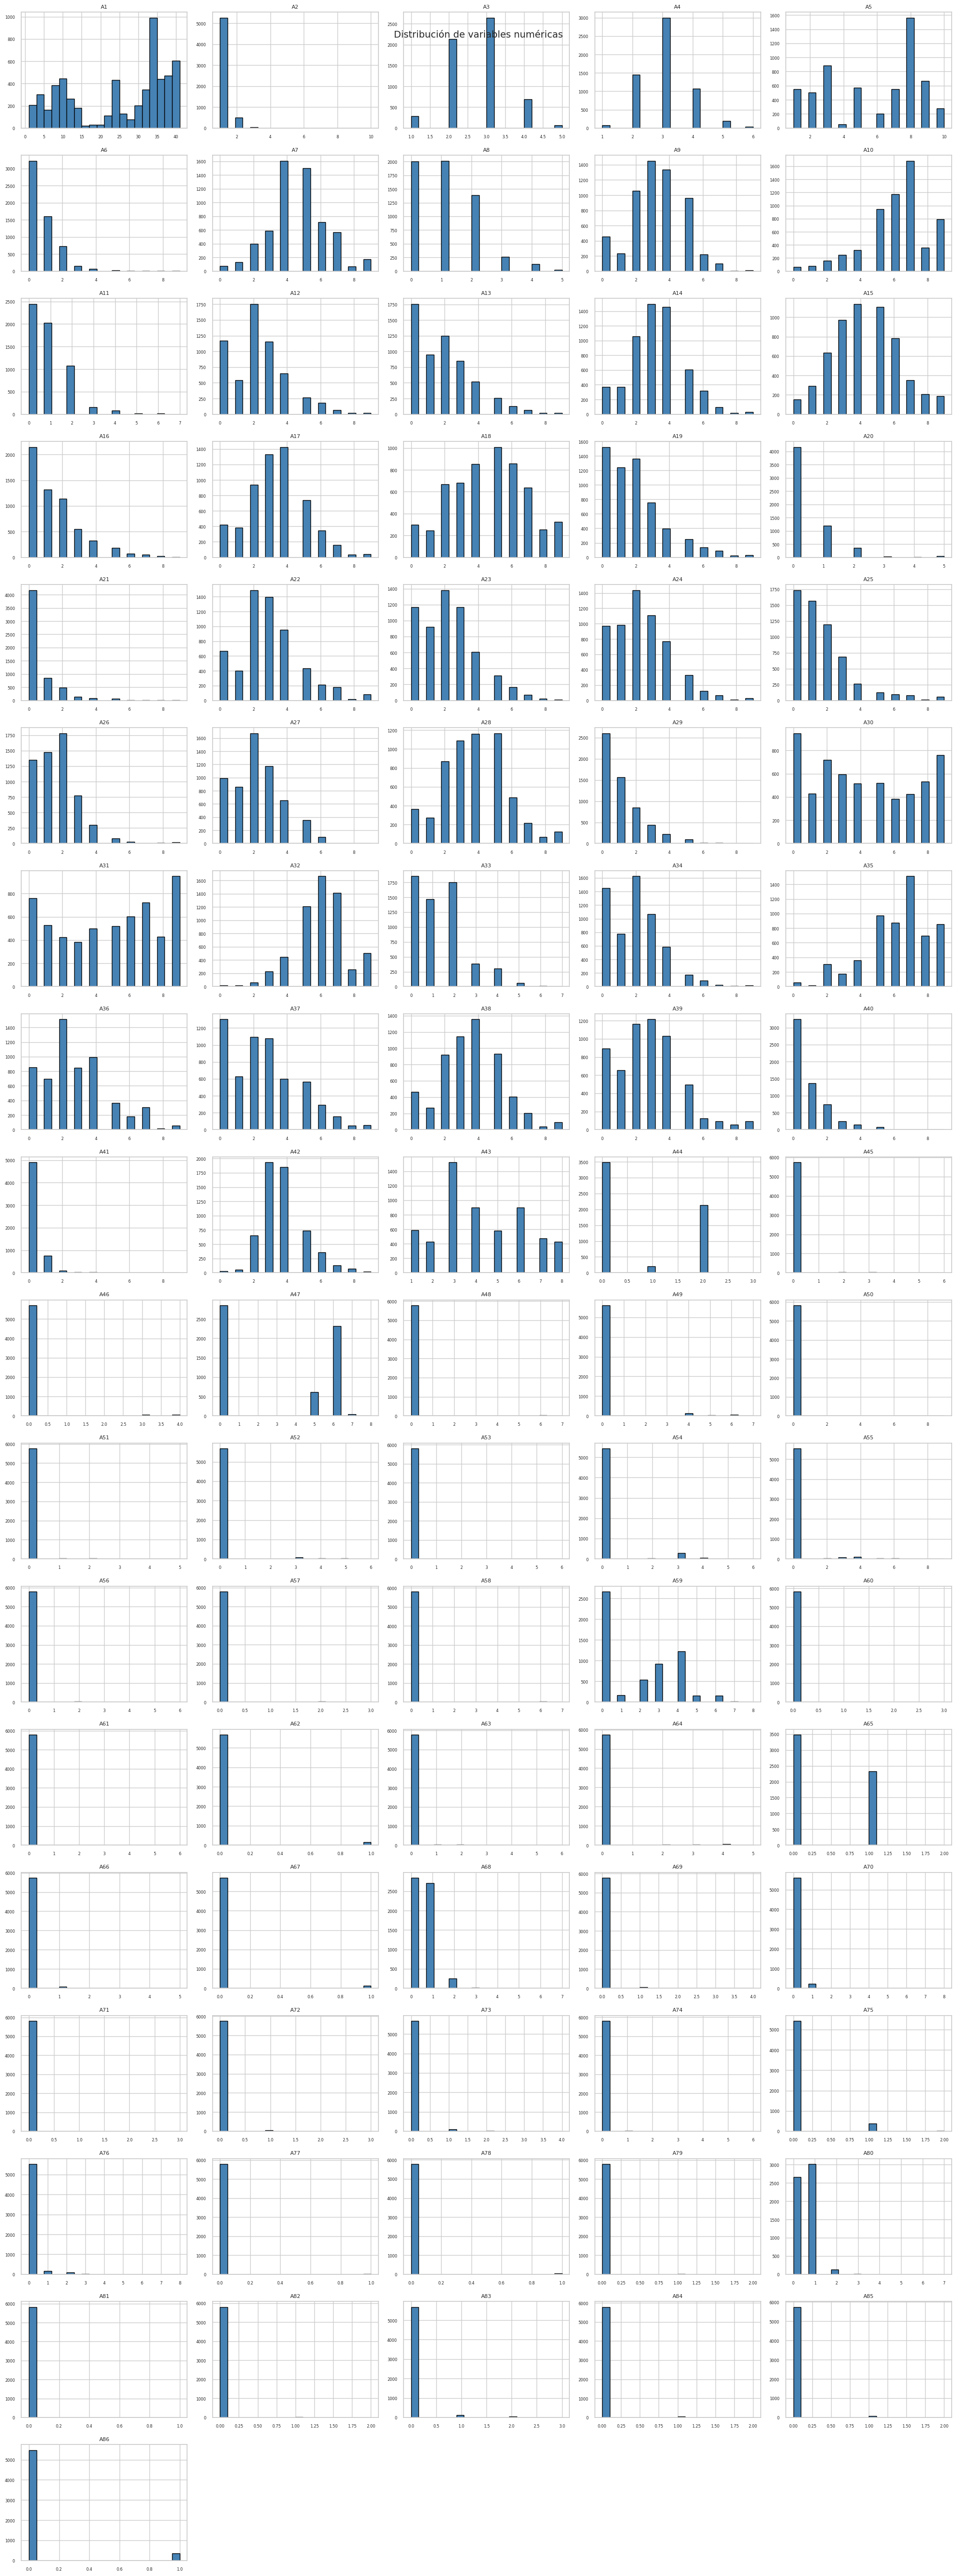

In [8]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
#df[num_cols].hist(bins=20, figsize=(18, 15))
#plt.suptitle("Distribución de variables numéricas", fontsize=16)
#plt.show()

cols = 5
rows = math.ceil(len(num_cols) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))  # ancho fijo, alto proporcional
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col], bins=20, color="steelblue", edgecolor="black")
    axes[i].set_title(col, fontsize=8)   # títulos pequeños
    axes[i].tick_params(axis="x", labelsize=6)  # ejes pequeños
    axes[i].tick_params(axis="y", labelsize=6)

# Eliminar subplots vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Distribución de variables numéricas", fontsize=14)
plt.tight_layout()
plt.show()

1.4.1 Detección de outliners en variables numéricas

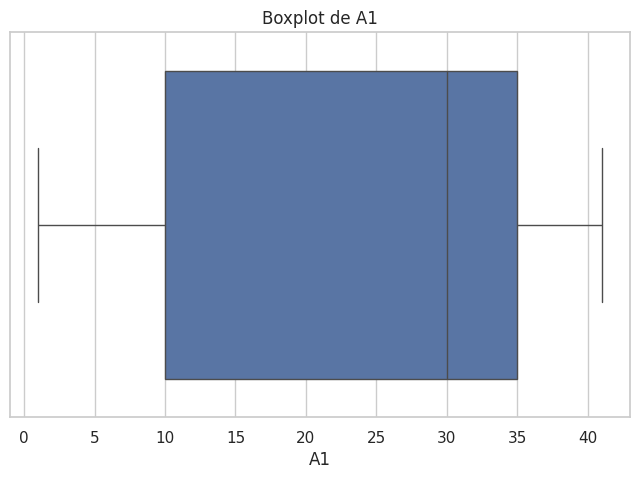

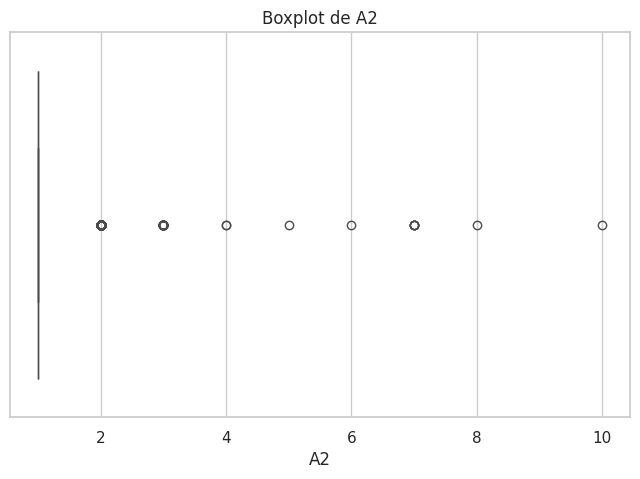

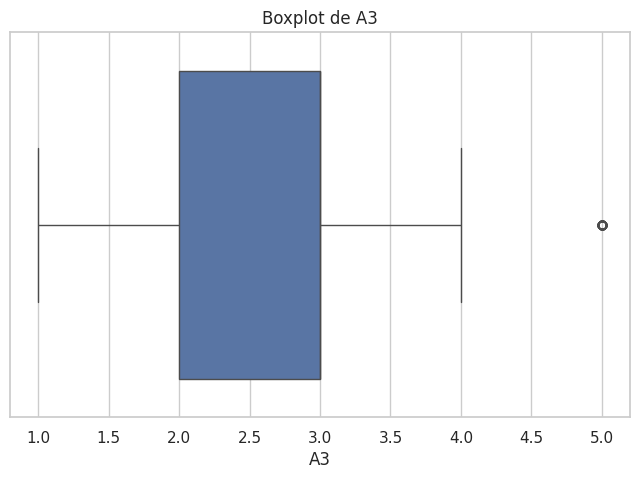

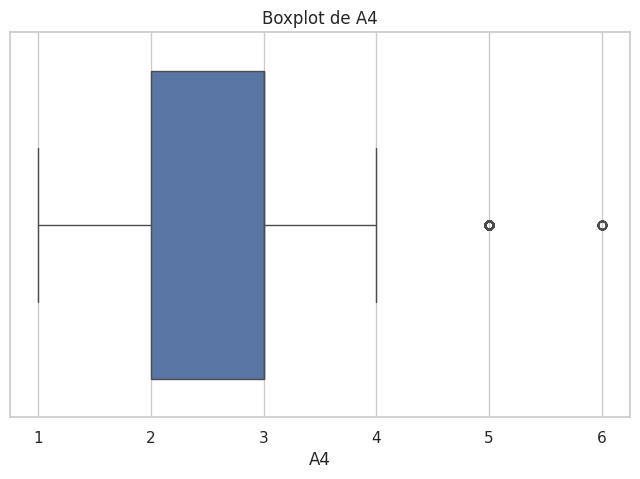

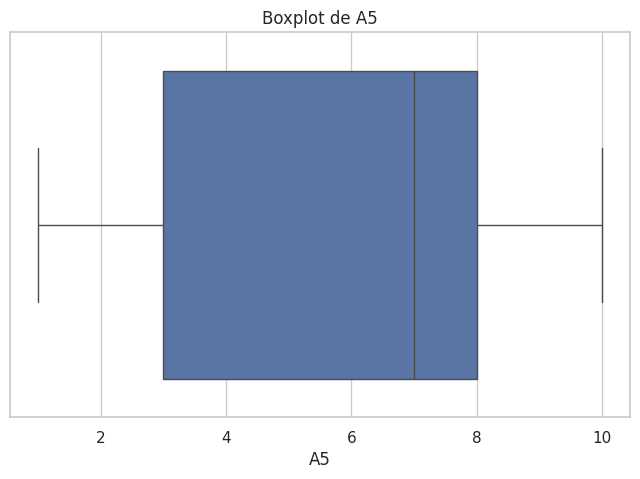

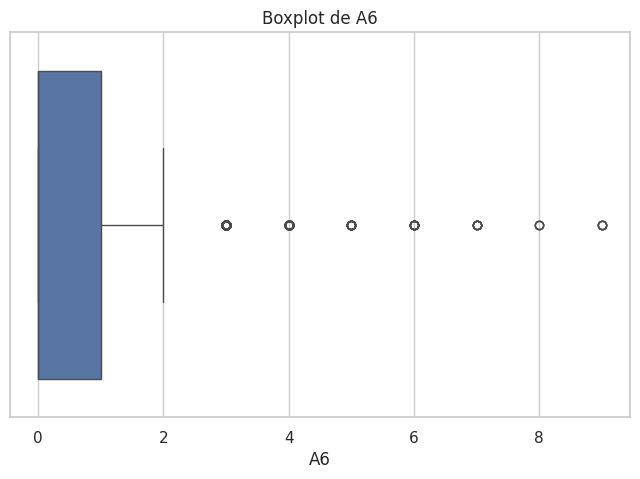

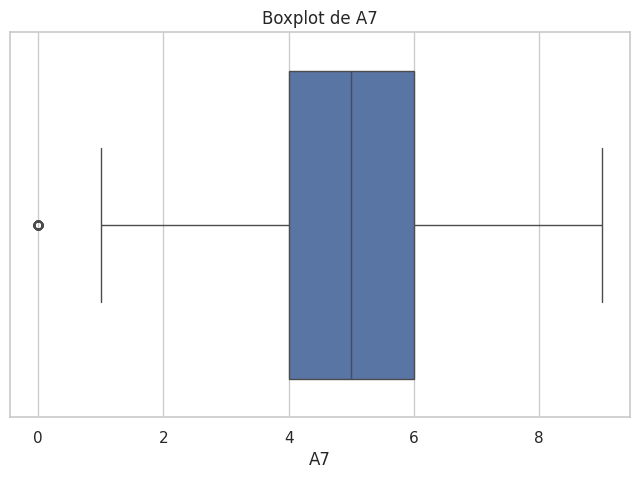

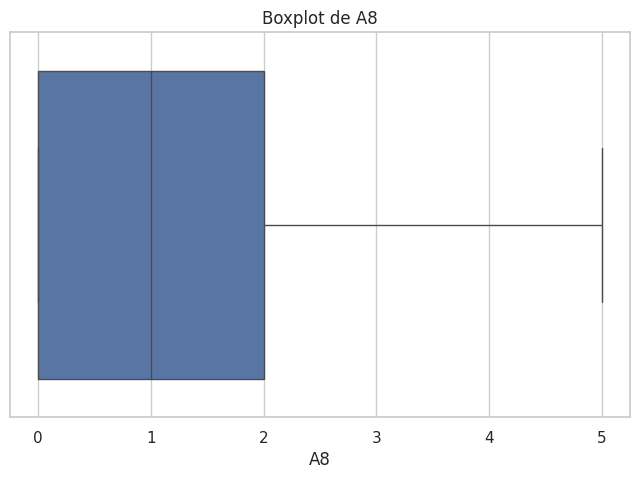

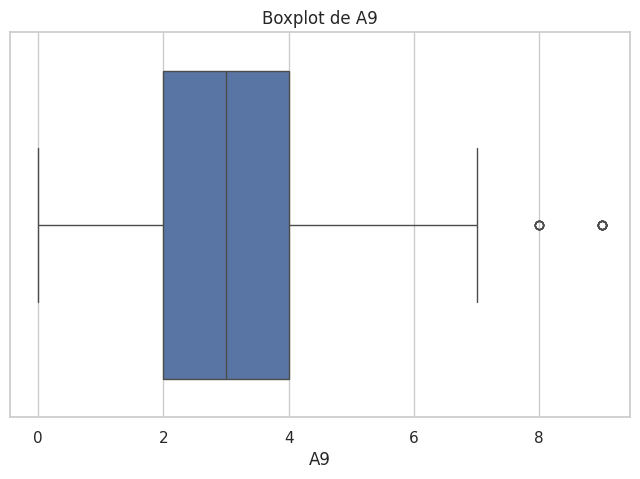

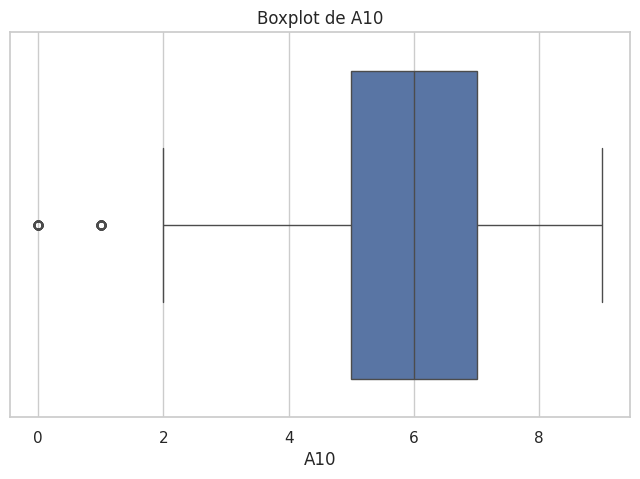

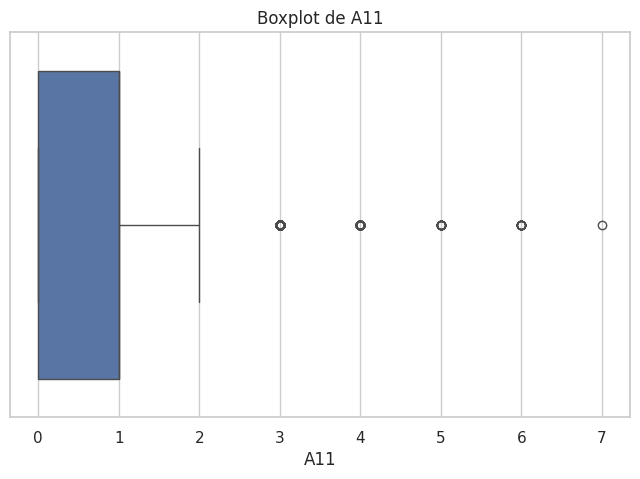

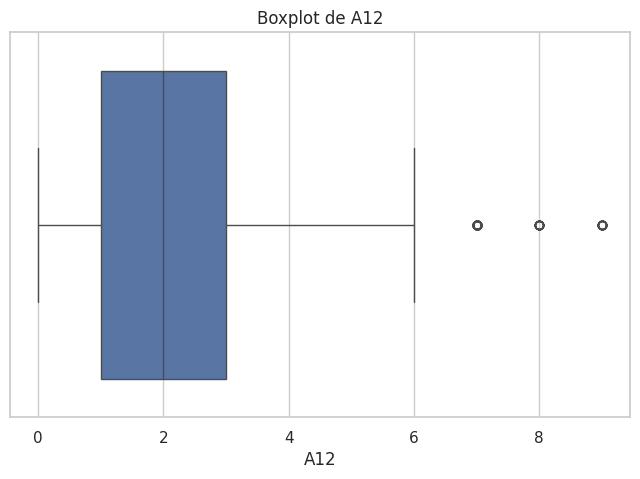

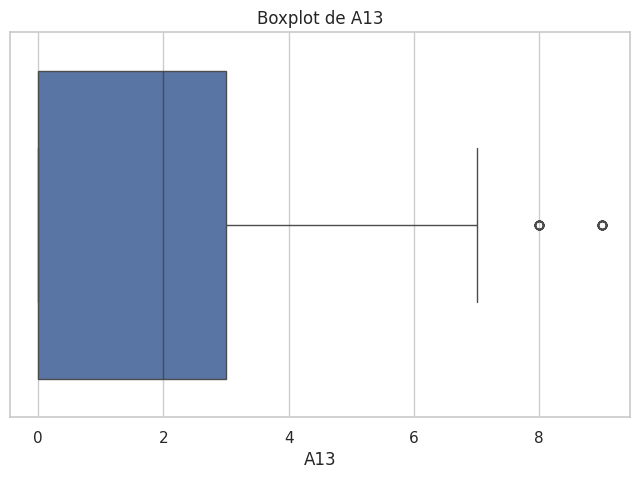

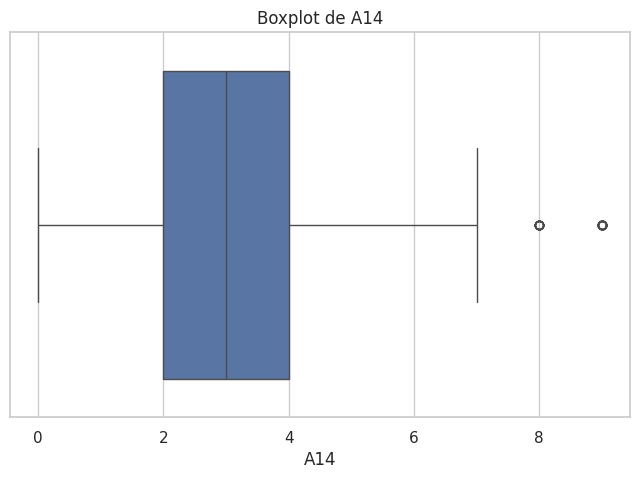

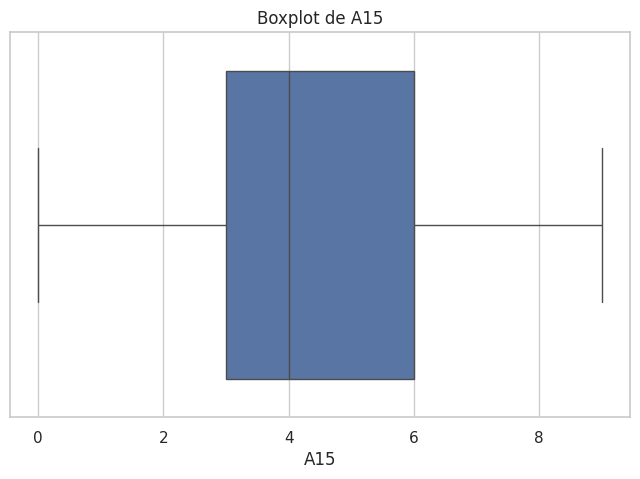

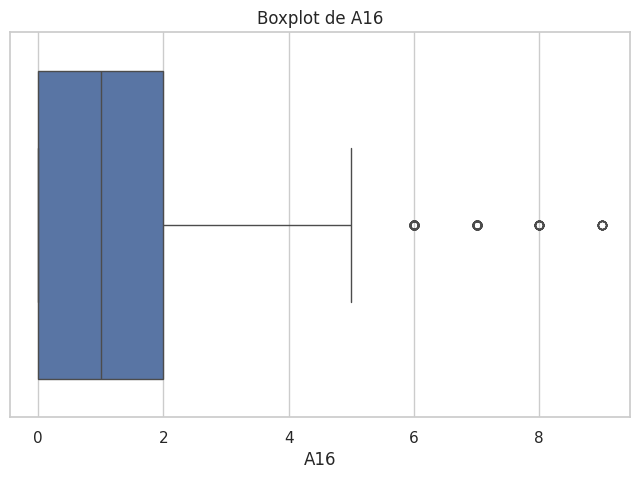

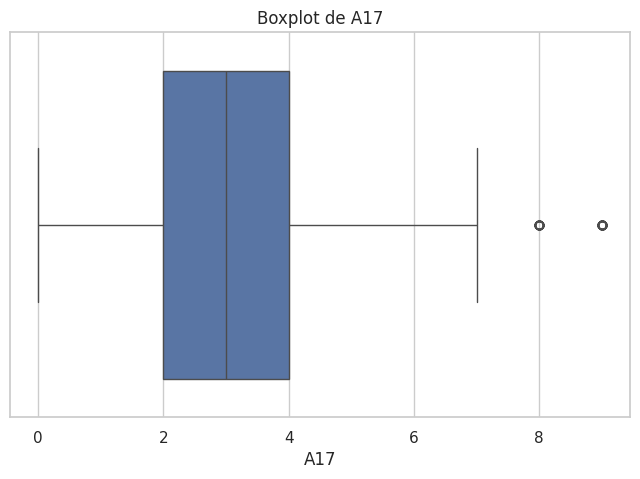

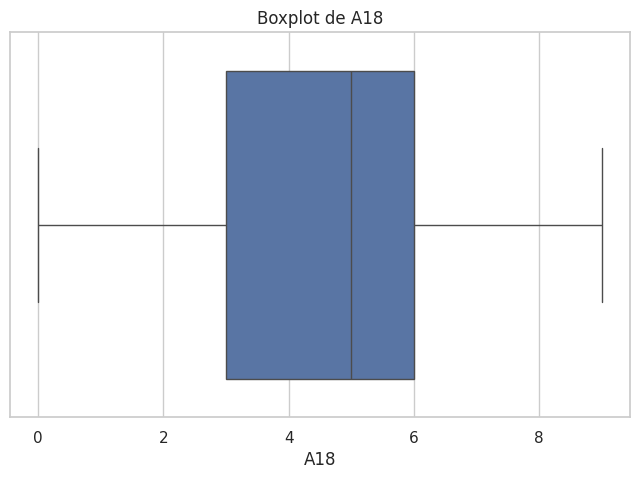

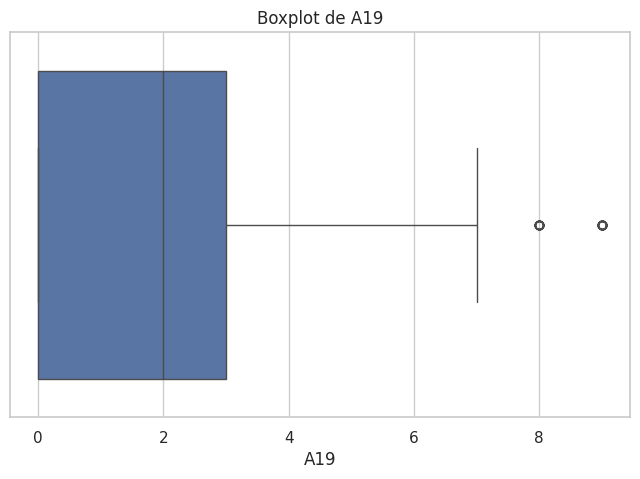

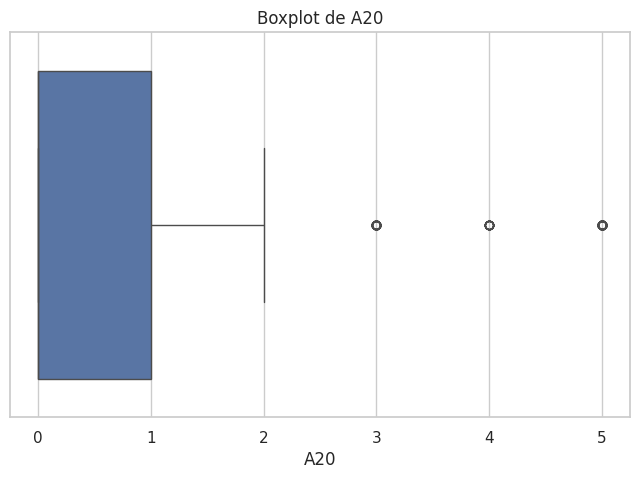

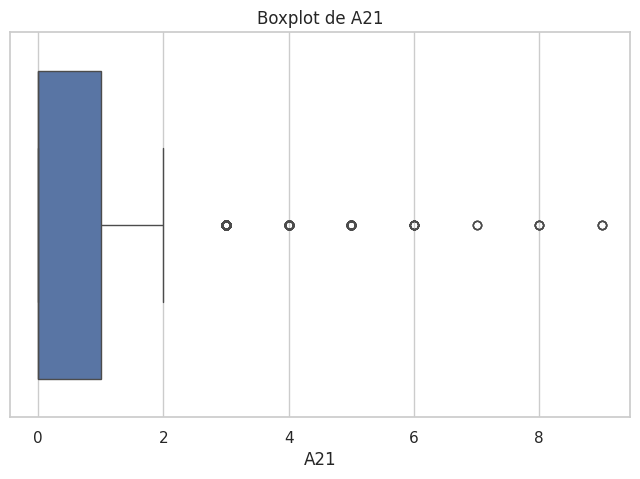

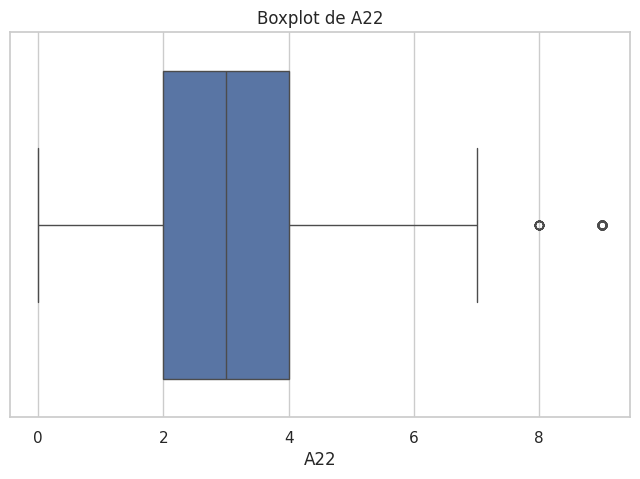

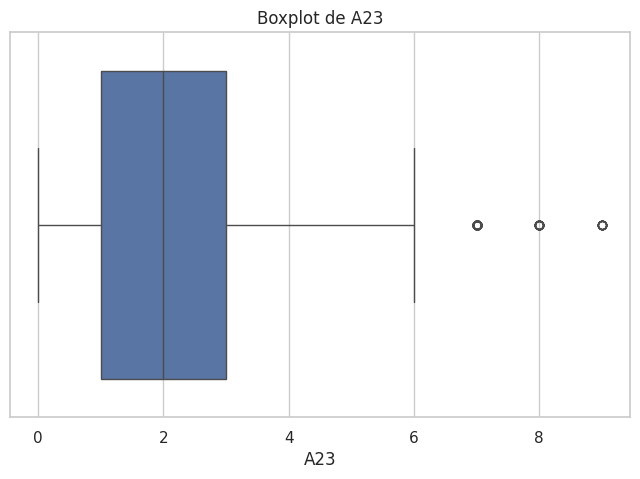

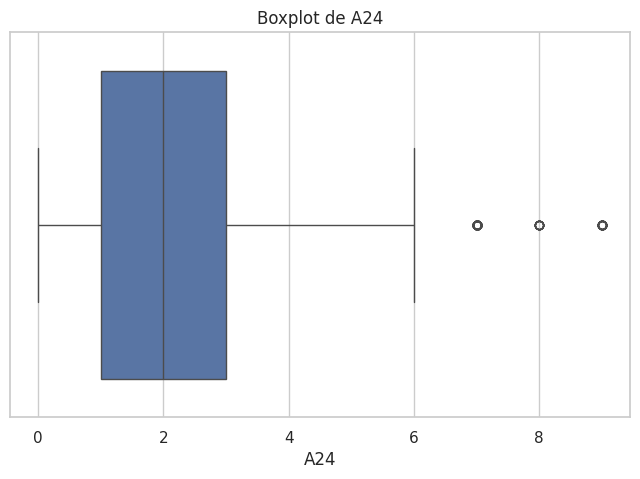

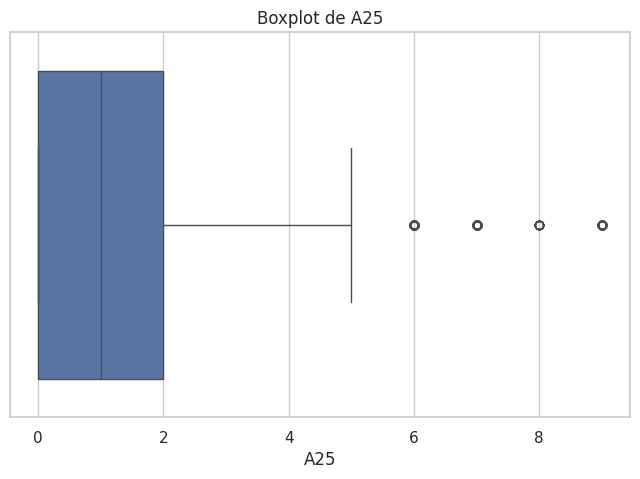

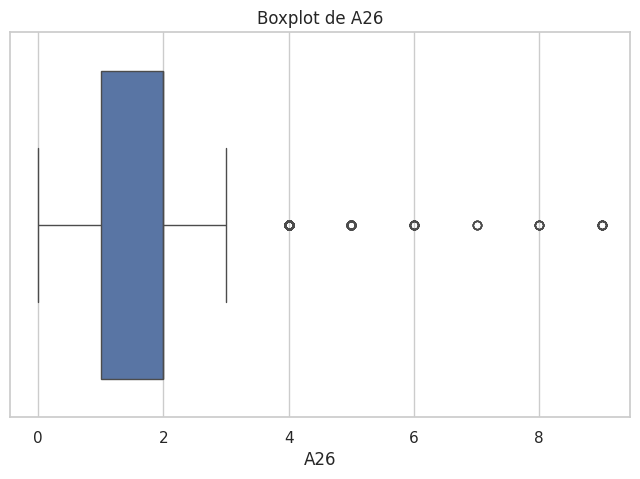

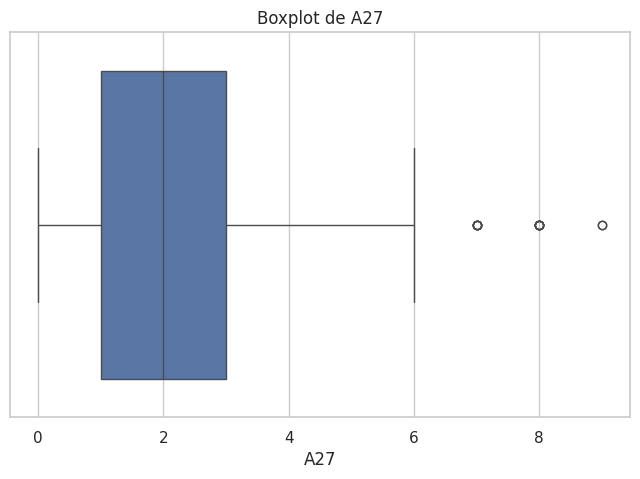

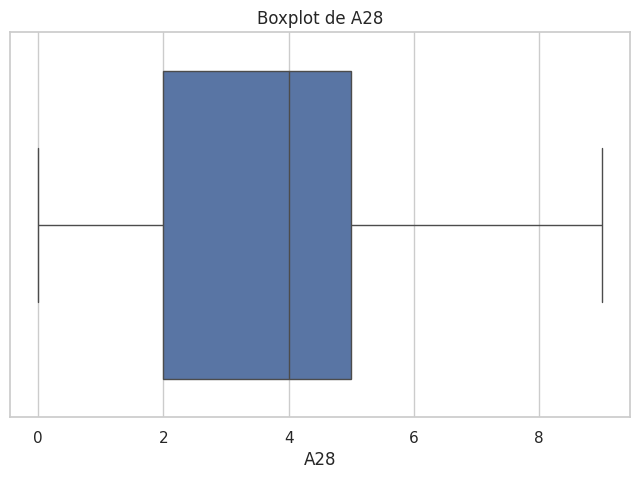

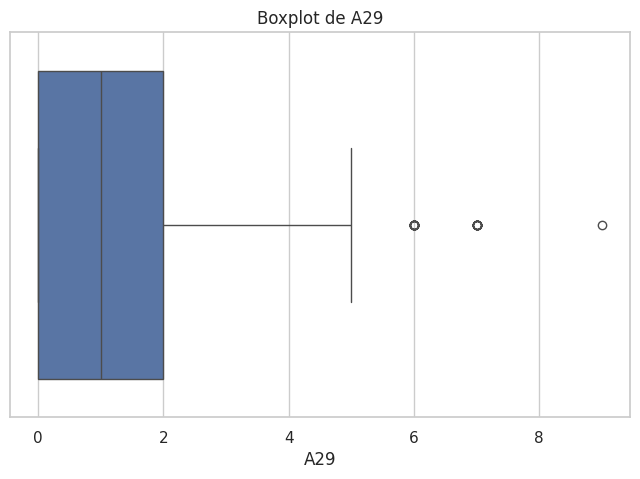

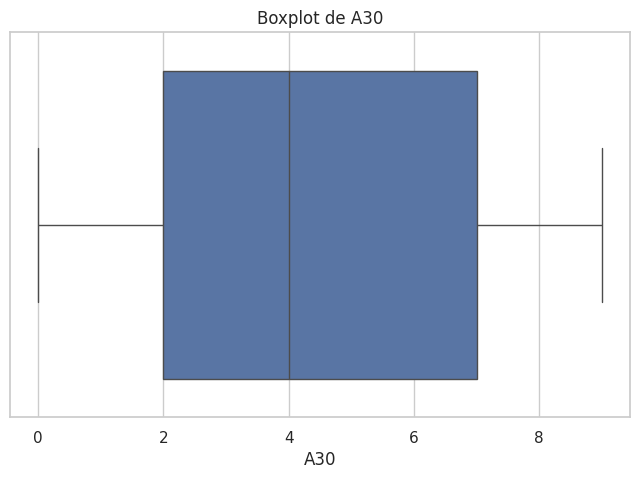

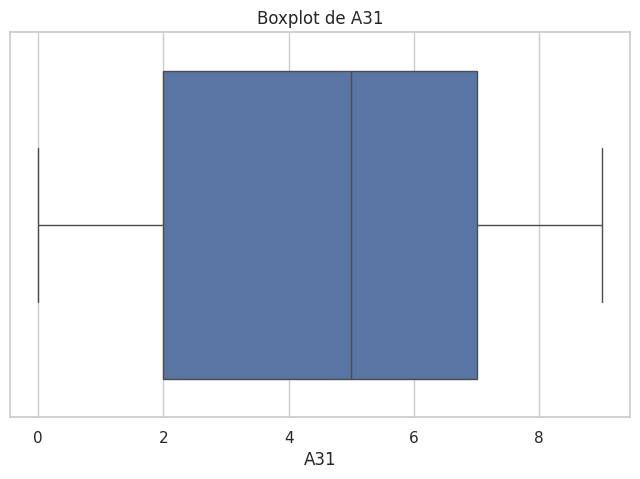

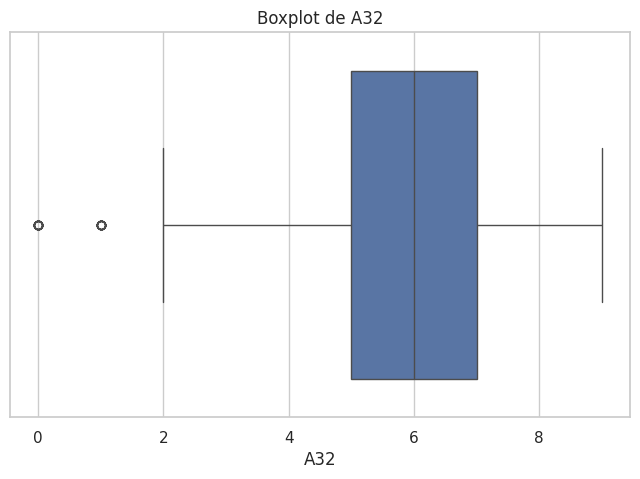

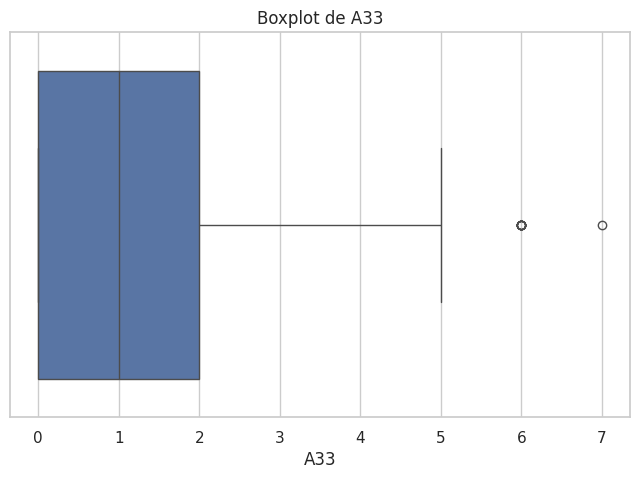

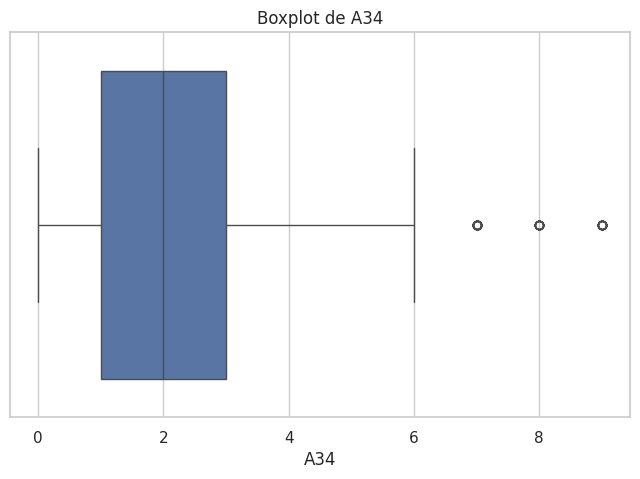

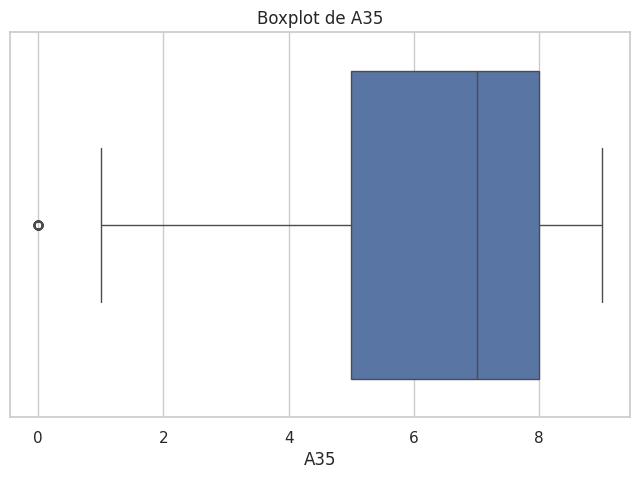

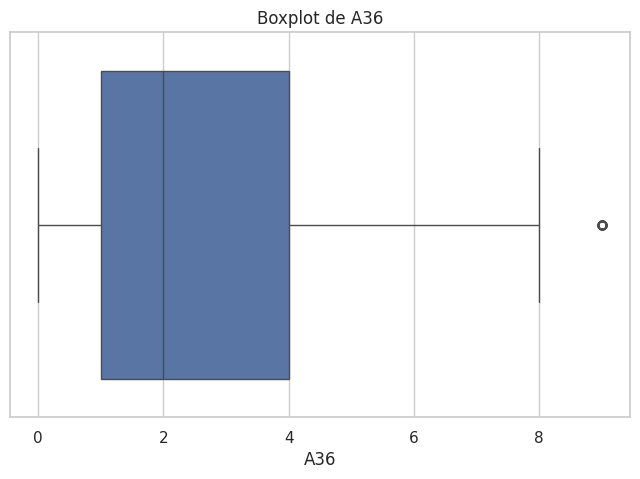

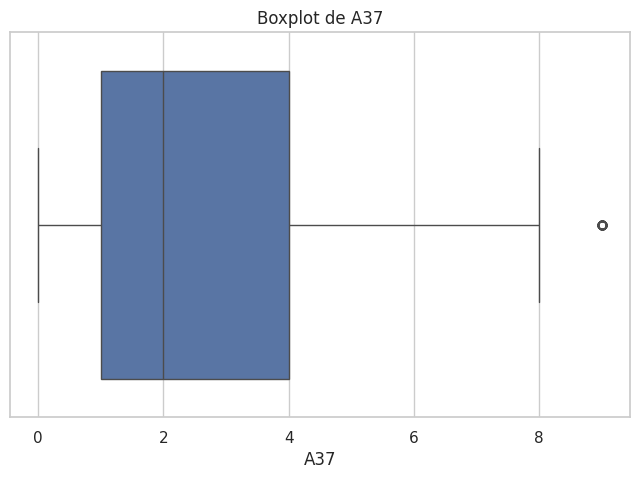

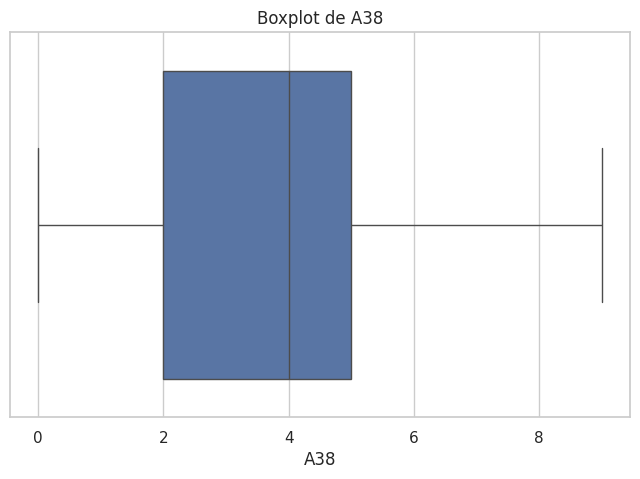

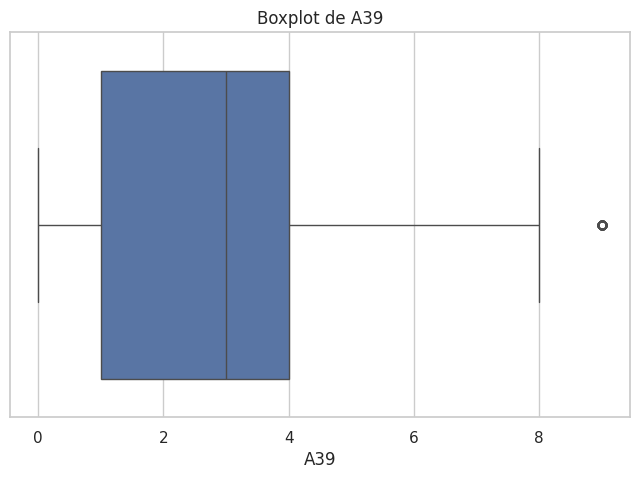

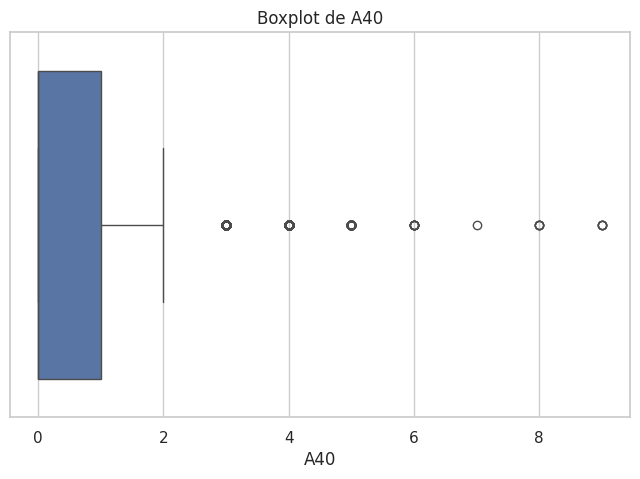

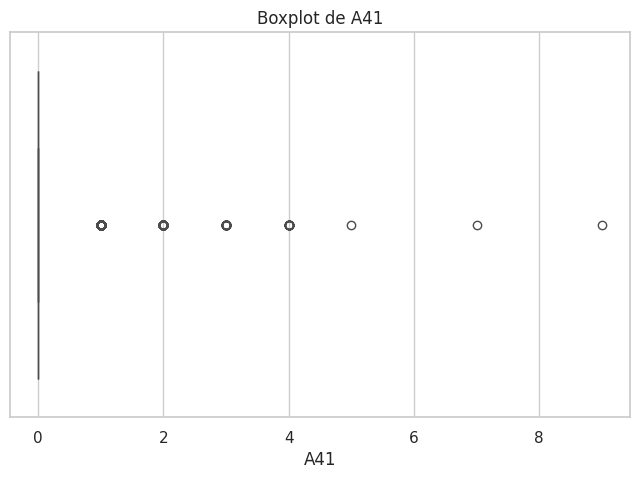

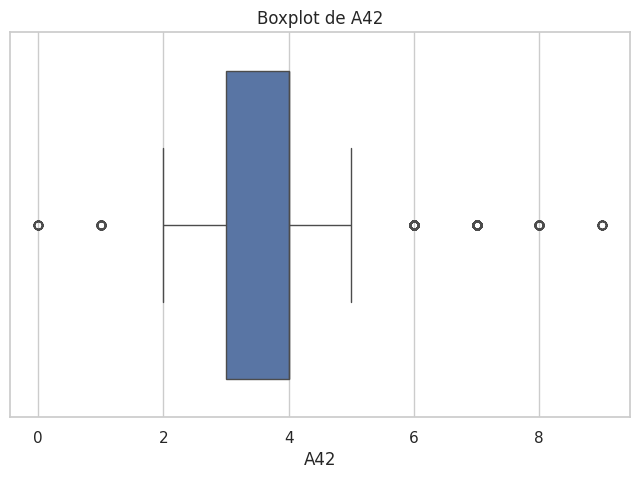

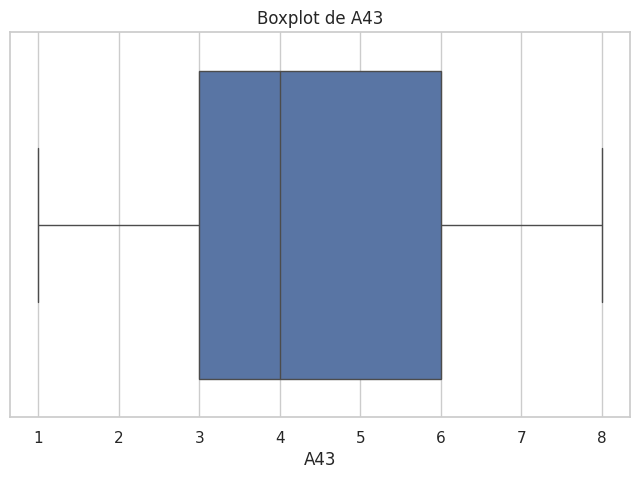

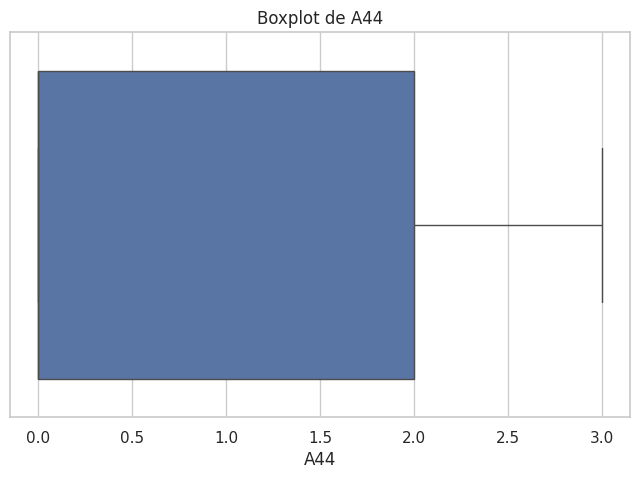

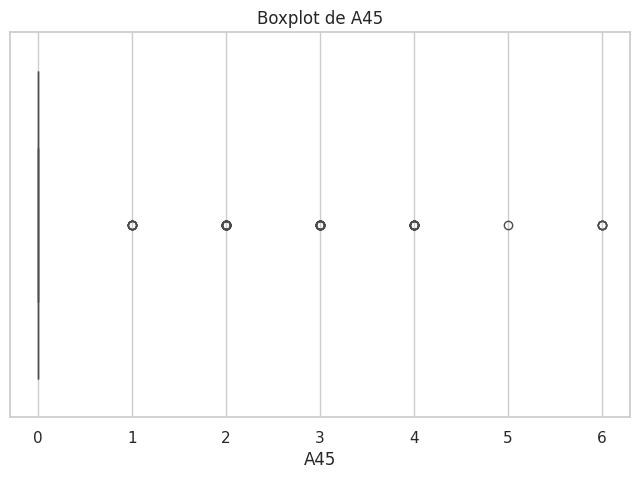

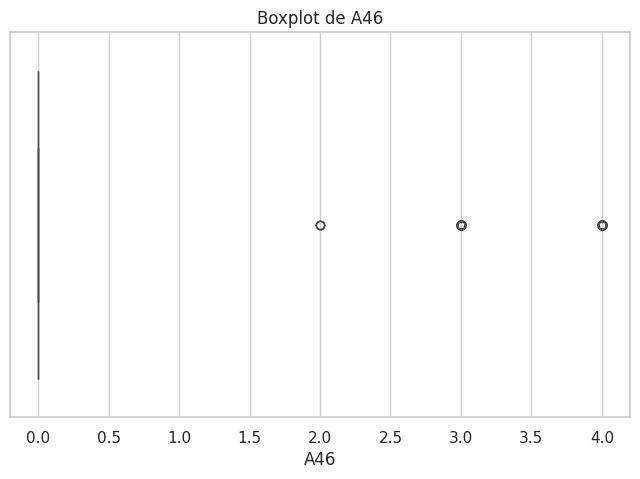

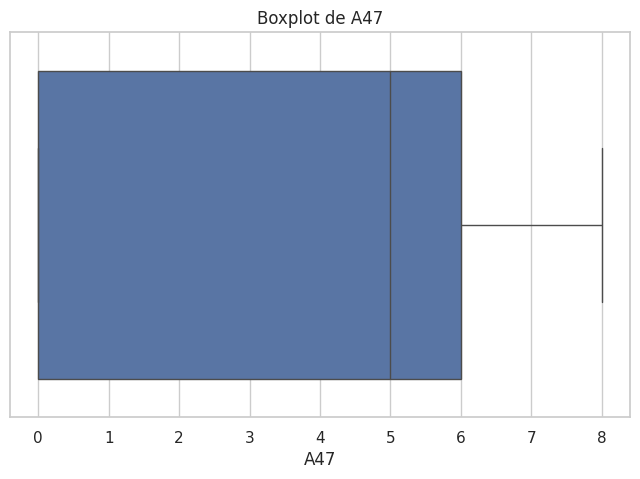

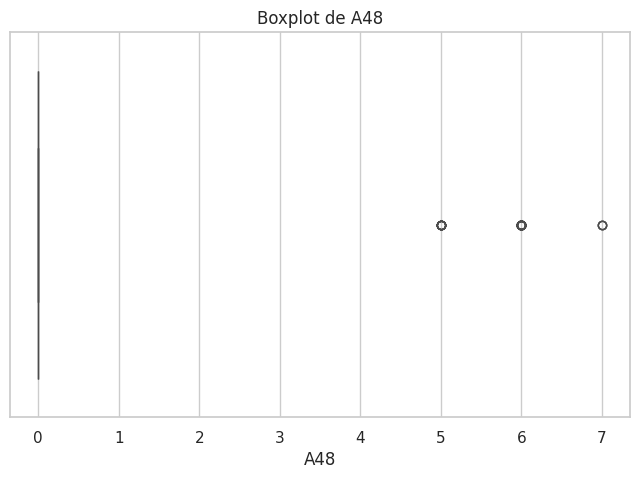

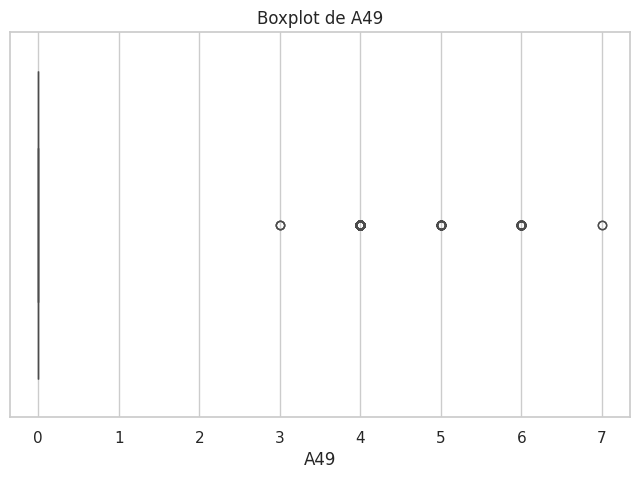

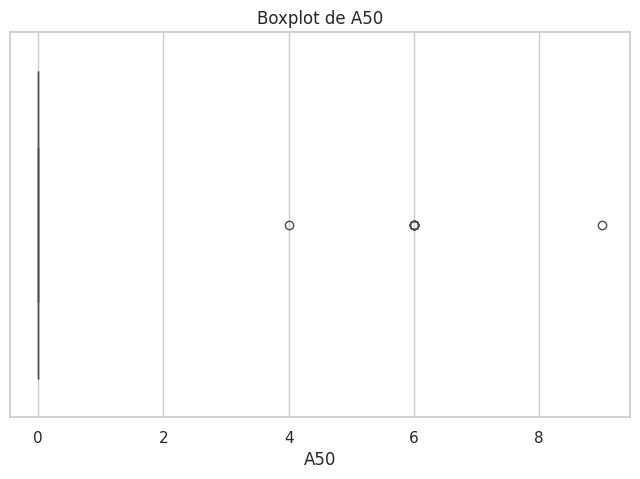

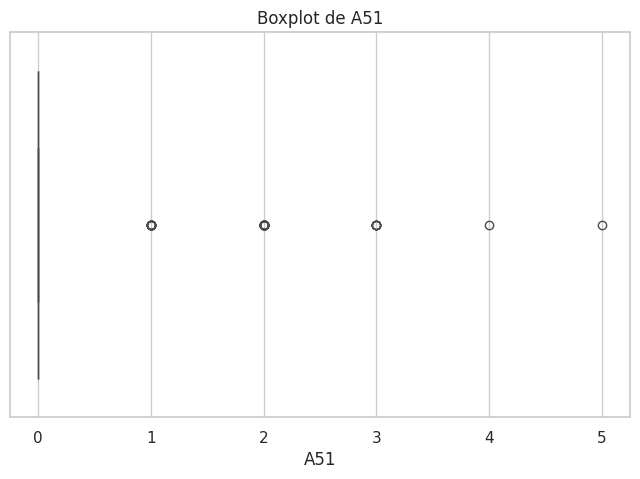

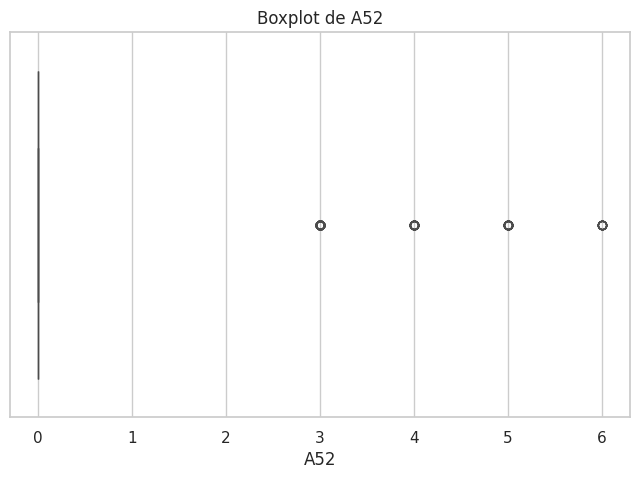

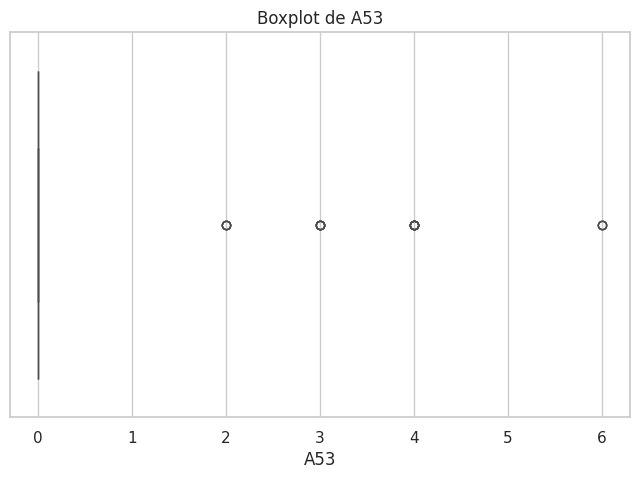

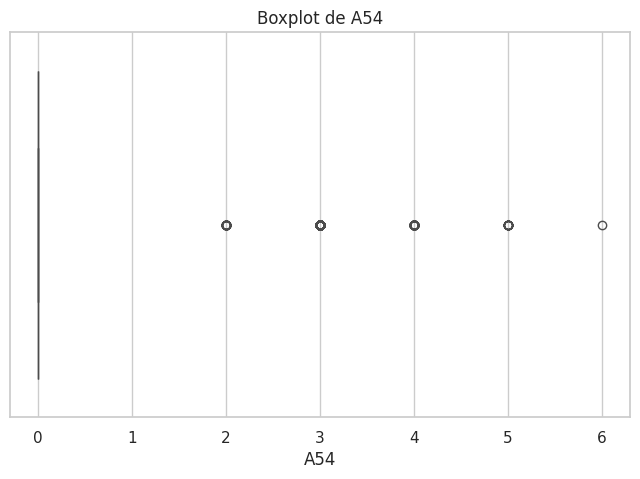

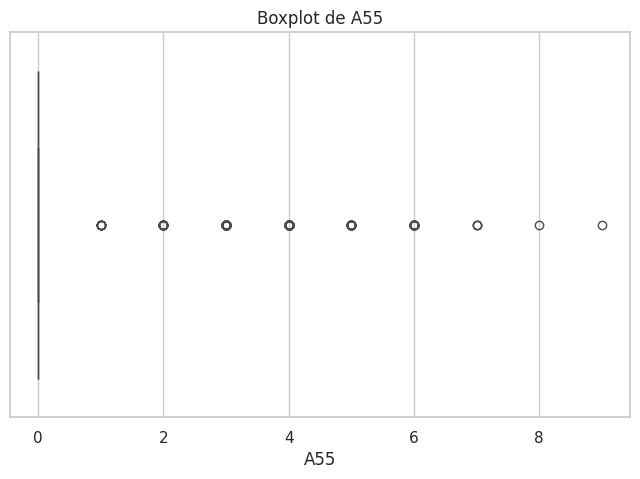

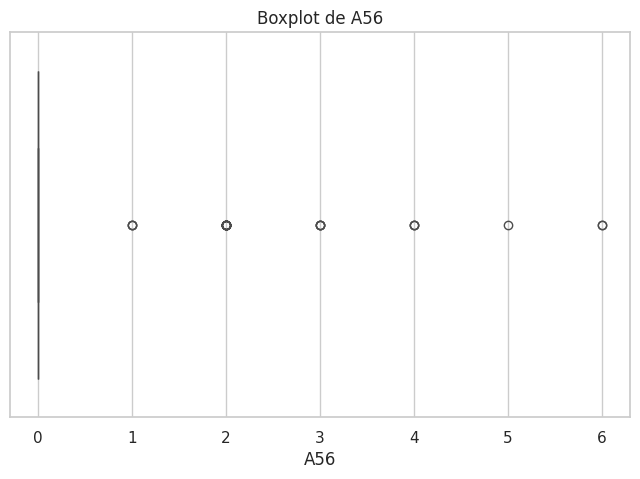

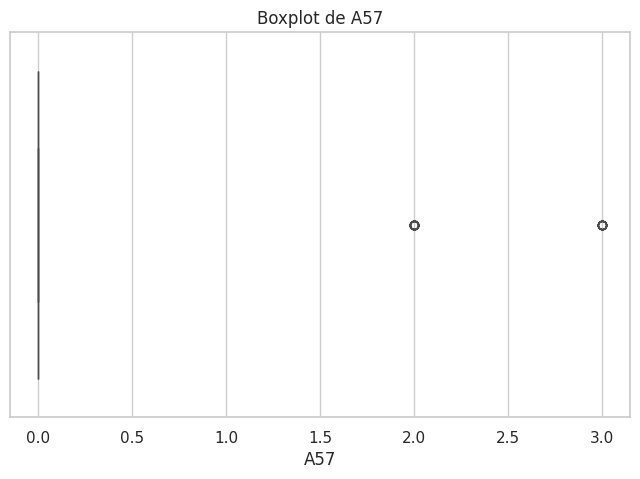

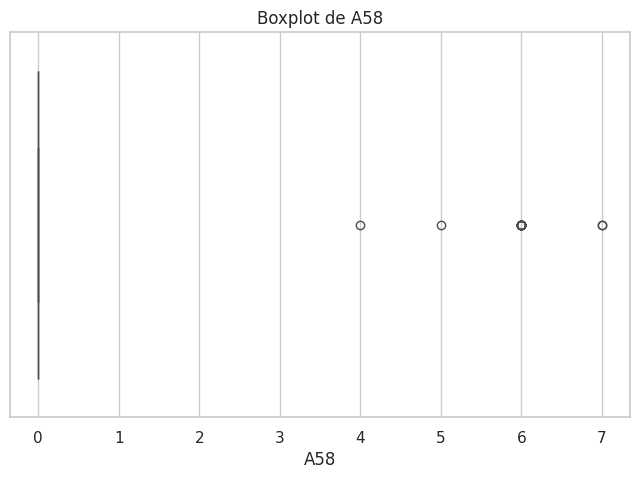

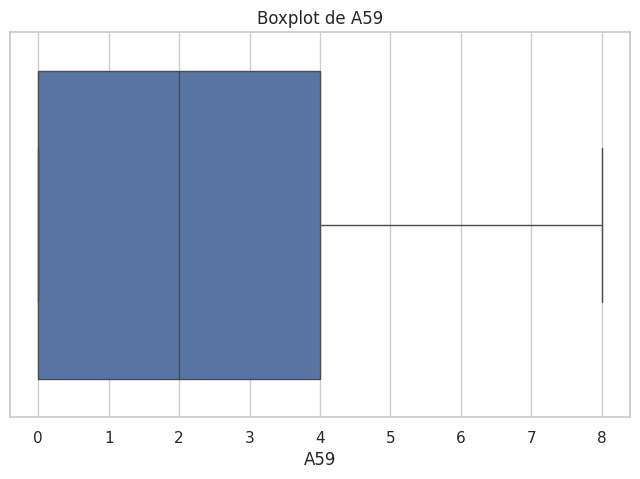

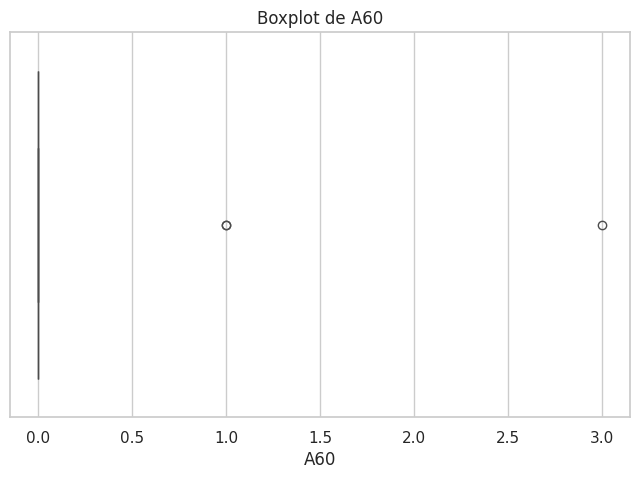

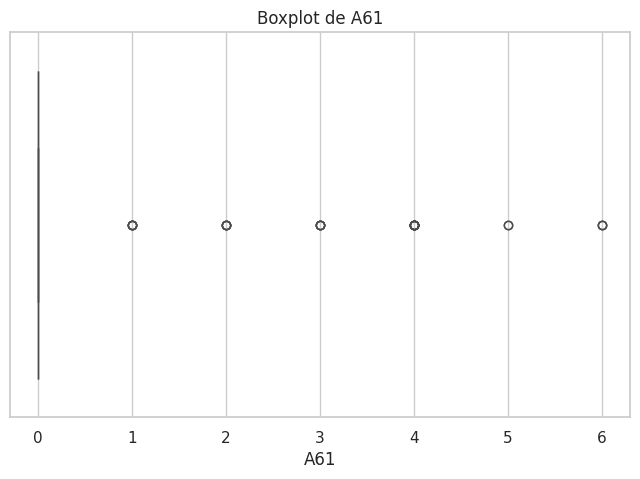

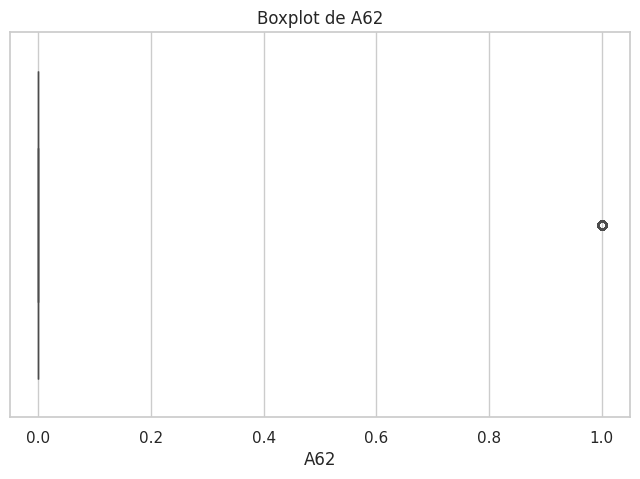

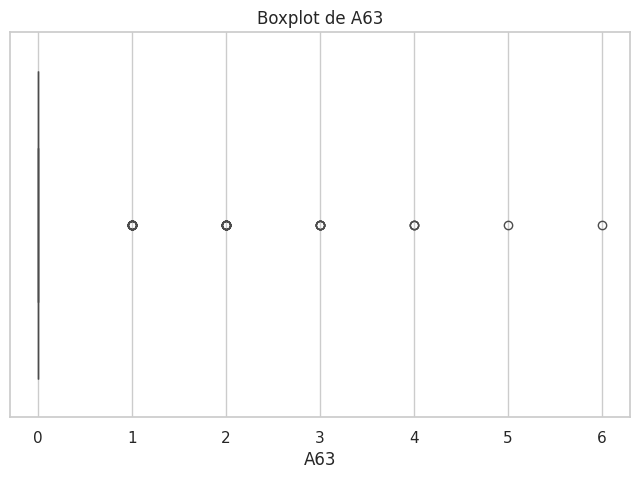

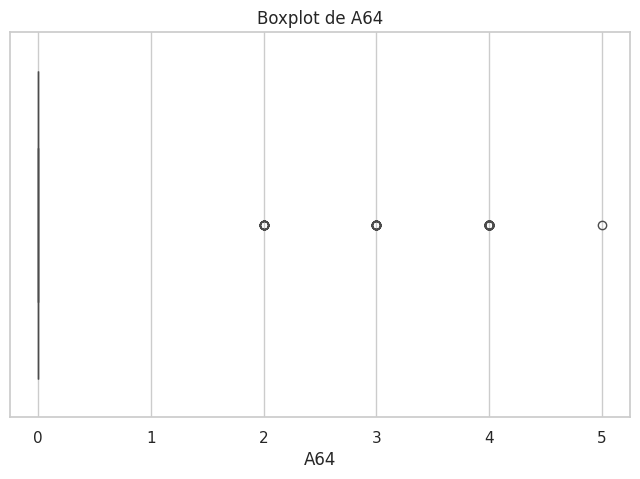

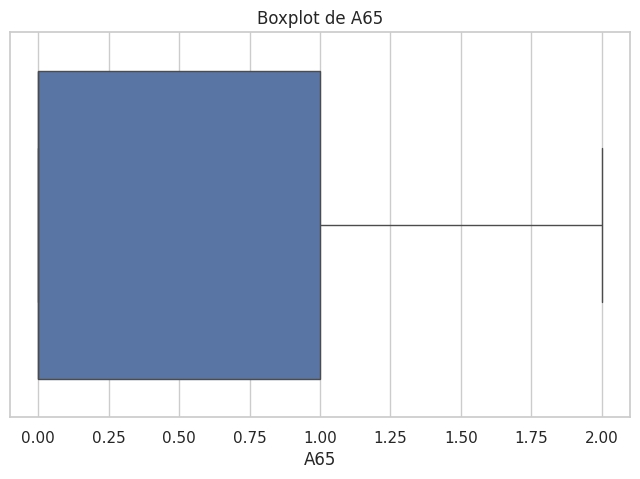

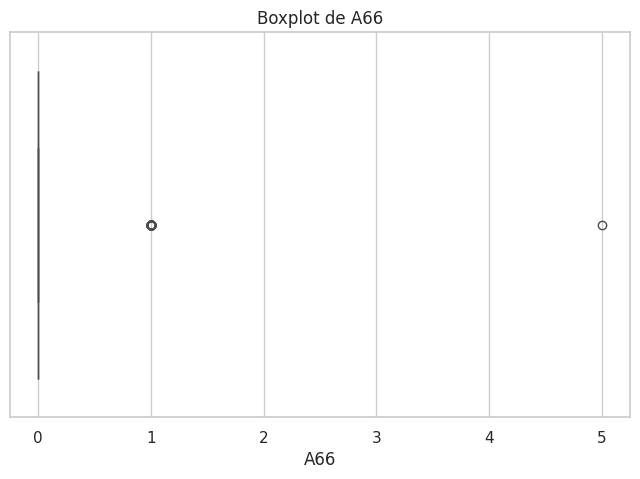

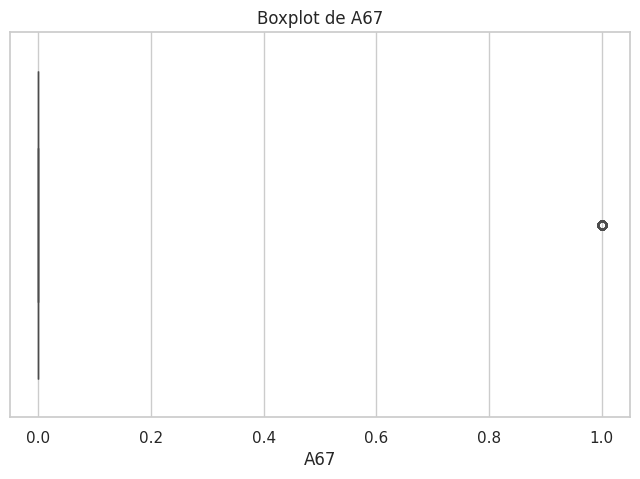

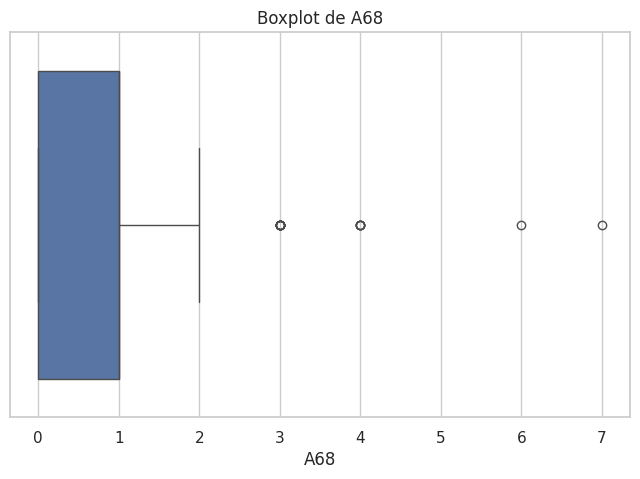

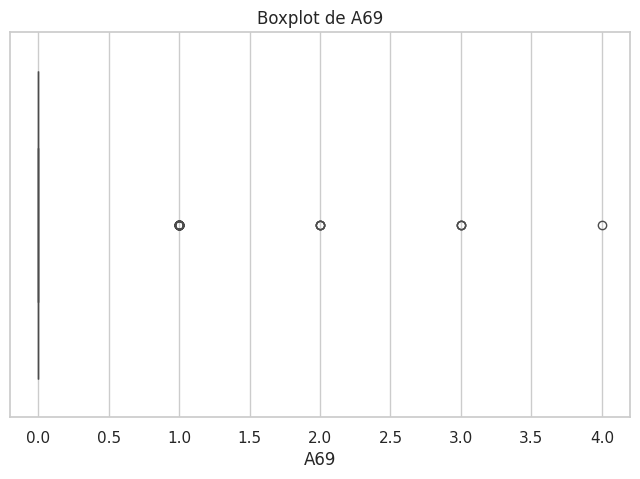

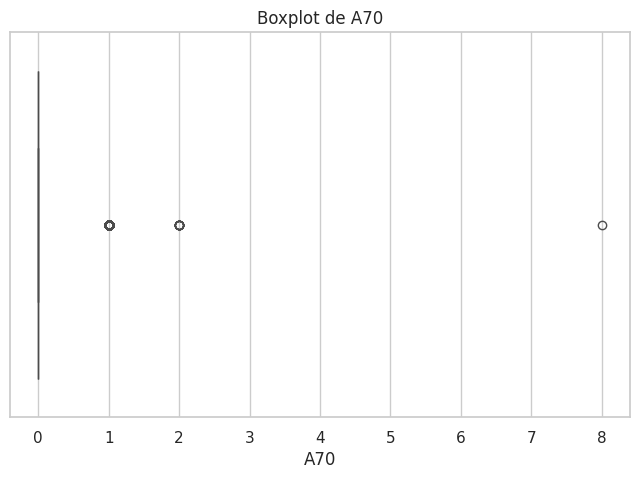

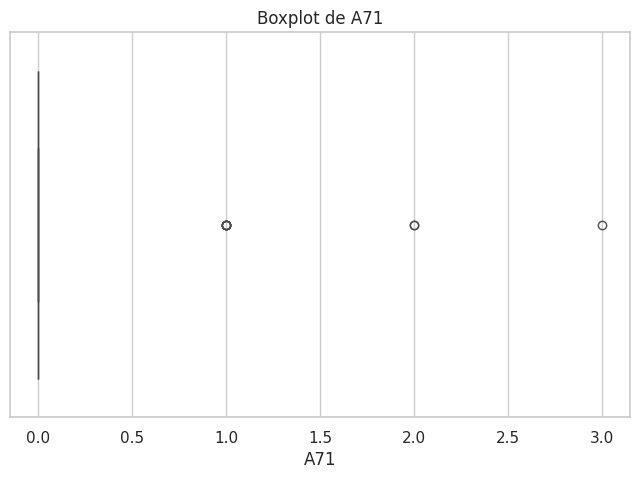

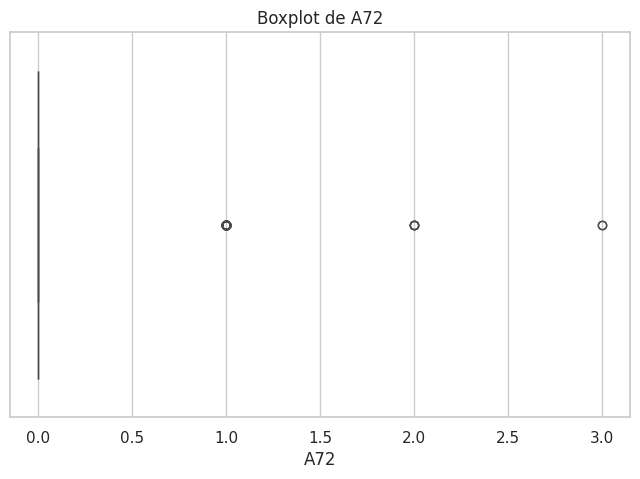

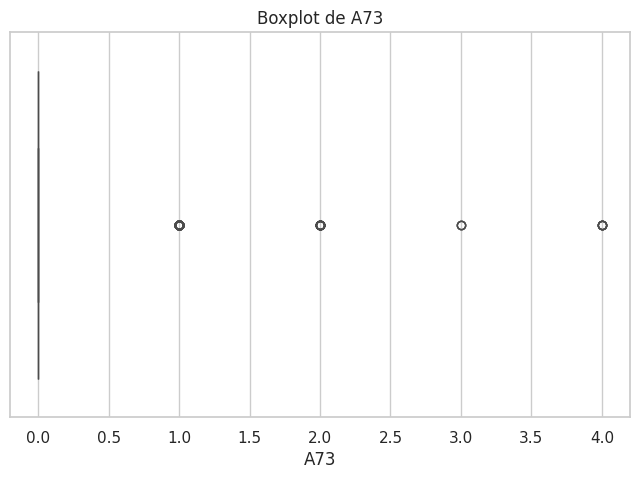

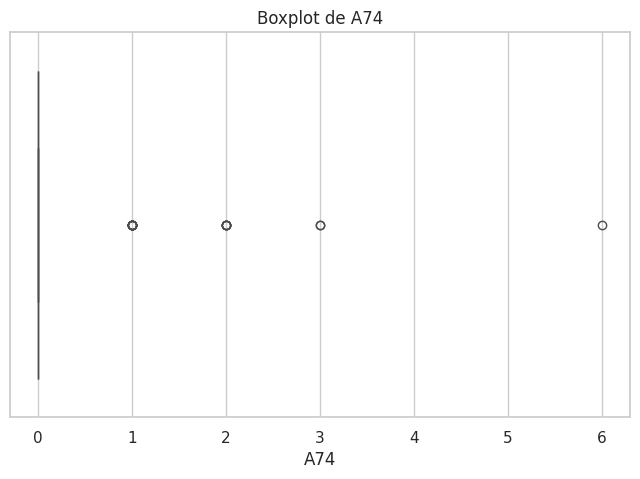

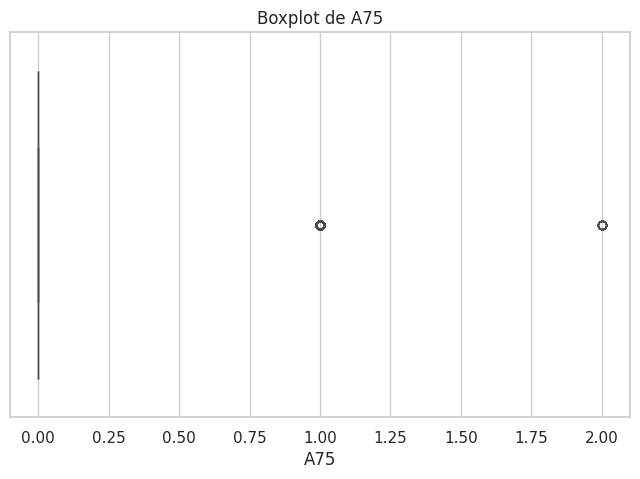

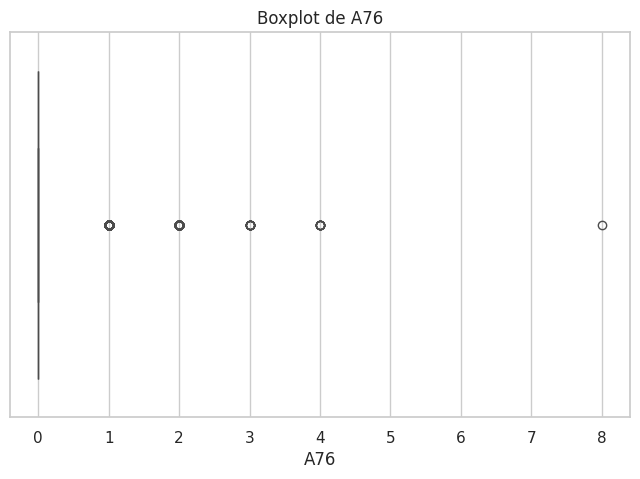

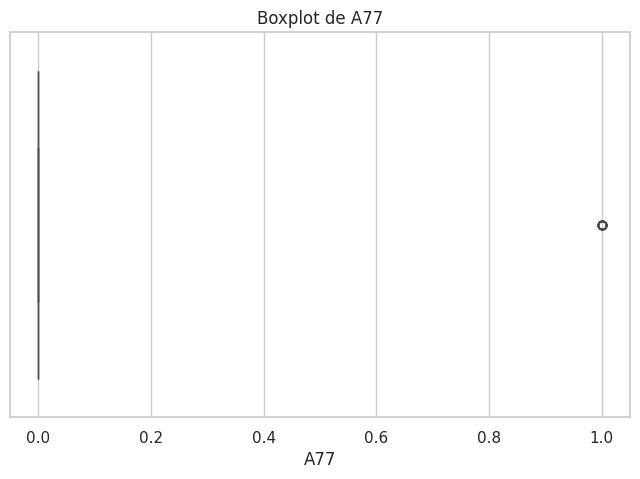

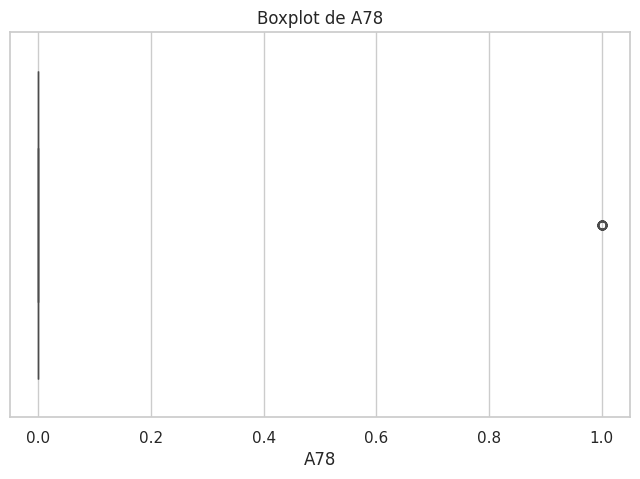

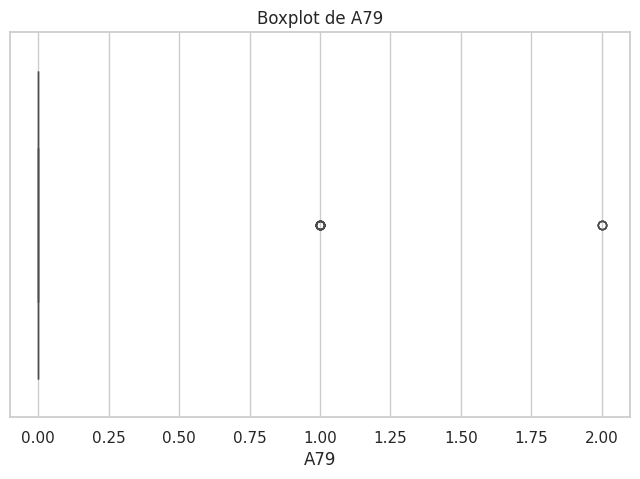

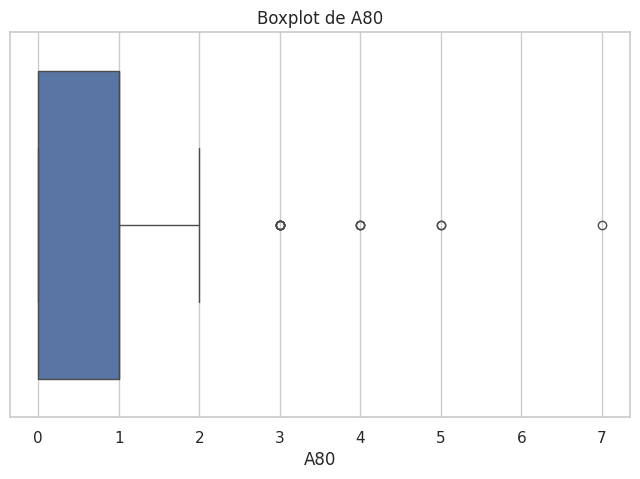

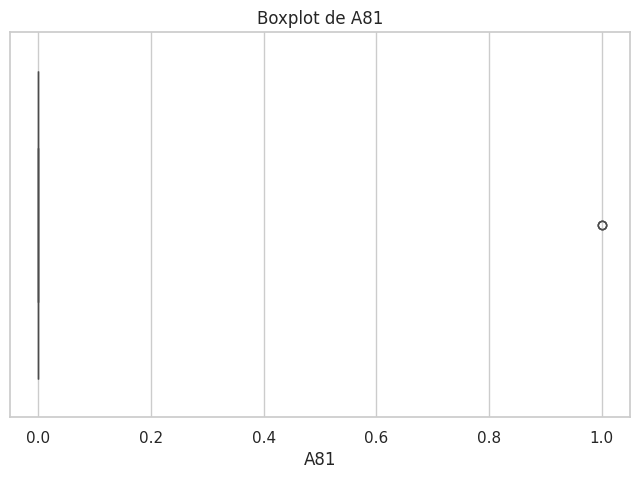

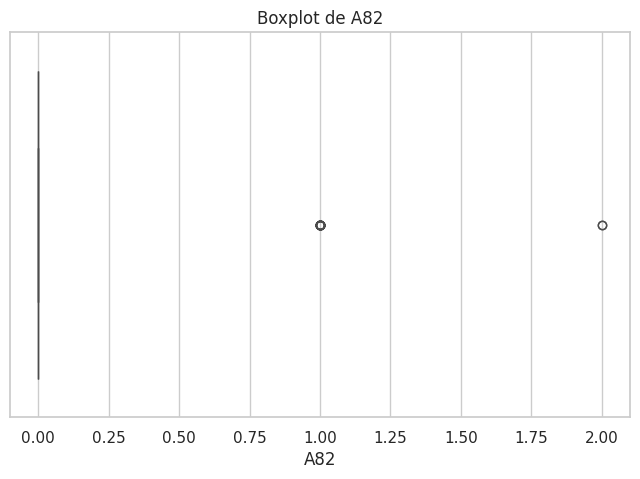

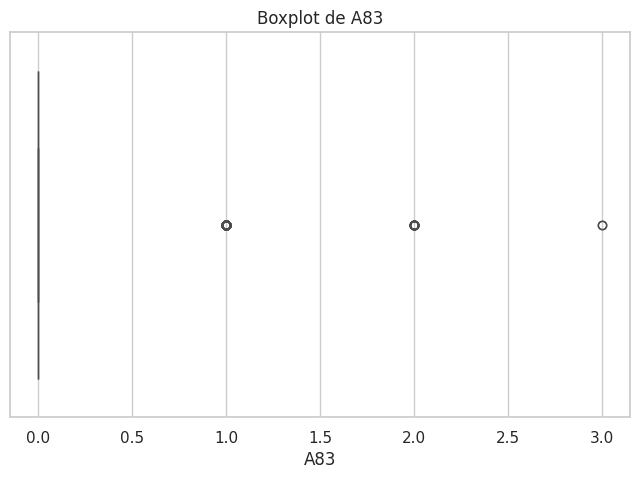

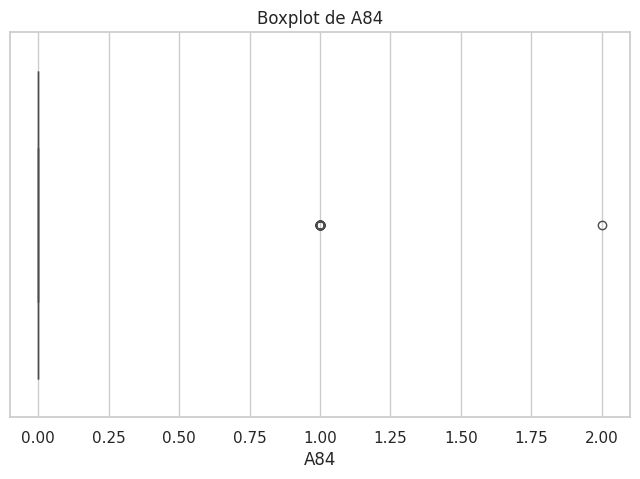

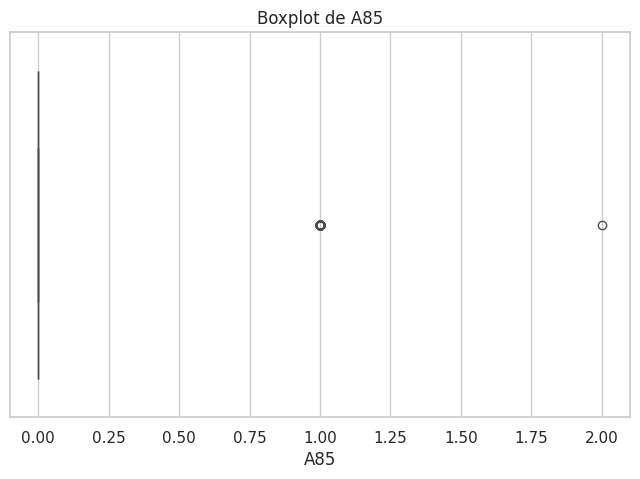

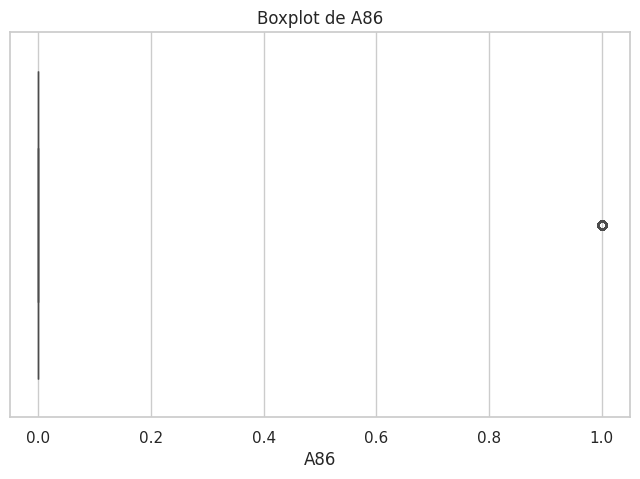

In [9]:
for col in num_cols:#[:6]:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

1.5 Correlación entre variables numéricas

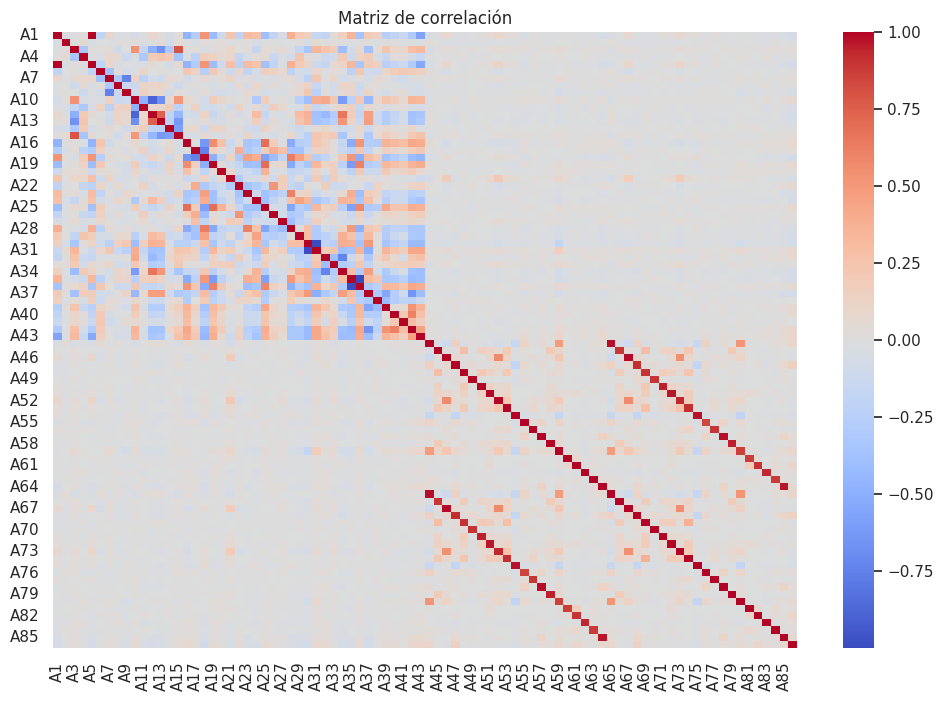

In [10]:
# Al contar con un número grande de features, se meustra el heatmap consolidado, pero se mostrará segmentado para propiciar el análisis
corr = df[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()

In [11]:
# Filtrar correlaciones fuertes (|r| > 0.7 y != 1.0)

#strong_corr = corr[(corr.abs() > 0.7) & (corr != 1.0)]
#strong_corr.dropna(how="all", axis=0).dropna(how="all", axis=1)

strong_corr = corr[(corr.abs() > 0.7) & (corr != 1.0)]
strong_corr = strong_corr.dropna(how="all", axis=0).dropna(how="all", axis=1)

# Crear lista de correlaciones por feature
correlation_list = []

for col in strong_corr.columns:
    correlated_features = strong_corr[col].dropna()
    for feat, value in correlated_features.items():
        correlation_list.append({
            "Feature": col,
            "Correlated_Feature": feat,
            "Correlation": value
        })

# Convertir a DataFrame
correlation_df = pd.DataFrame(correlation_list)

# Ordenar por nombre de columna (Feature) alfabéticamente
#correlation_df = correlation_df.sort_values(by="Feature").reset_index(drop=True)
correlation_df.reset_index(drop=True, inplace=True)

#correlation_df.head(3)
correlation_df

Feature Correlated_Feature  Correlation
0       A1                 A5     0.992672
1       A3                A15     0.794015
2       A5                 A1     0.992672
3       A7                 A9    -0.741893
4       A9                 A7    -0.741893
5      A10                A12    -0.884366
6      A12                A10    -0.884366
7      A12                A13     0.745645
8      A13                A12     0.745645
9      A15                 A3     0.794015
10     A17                A18    -0.747552
11     A18                A17    -0.747552
12     A30                A31    -0.999554
13     A31                A30    -0.999554
14     A32                A34    -0.734557
15     A34                A32    -0.734557
16     A35                A36    -0.999239
17     A36                A35    -0.999239
18     A44                A65     0.981367
19     A45                A66     0.895407
20     A46                A67     0.987579
21     A47                A68     0.916151
22     A48                A69     0.902995
23     A49                A70     0.904855
24     A50                A71     0.948663
25     A51                A72     0.966080
26     A52                A73     0.929818
27     A53                A74     0.909671
28     A54                A75     0.969707
29     A55                A76     0.850170
30     A56                A77     0.897562
31     A57                A78     0.979968
32     A58                A79     0.948430
33     A59                A80     0.865569
34     A60                A81     0.870334
35     A61                A82     0.904436
36     A62                A83     0.935854
37     A63                A84     0.875256
38     A64                A85     0.966239
39     A65                A44     0.981367
40     A66                A45     0.895407
41     A67                A46     0.987579
42     A68                A47     0.916151
43     A69                A48     0.902995
44     A70                A49     0.904855
45     A71                A50     0.948663
46     A72                A51     0.966080
47     A73                A52     0.929818
48     A74                A53     0.909671
49     A75                A54     0.969707
50     A76                A55     0.850170
51     A77                A56     0.897562
52     A78                A57     0.979968
53     A79                A58     0.948430
54     A80                A59     0.865569
55     A81                A60     0.870334
56     A82                A61     0.904436
57     A83                A62     0.935854
58     A84                A63     0.875256
59     A85                A64     0.966239

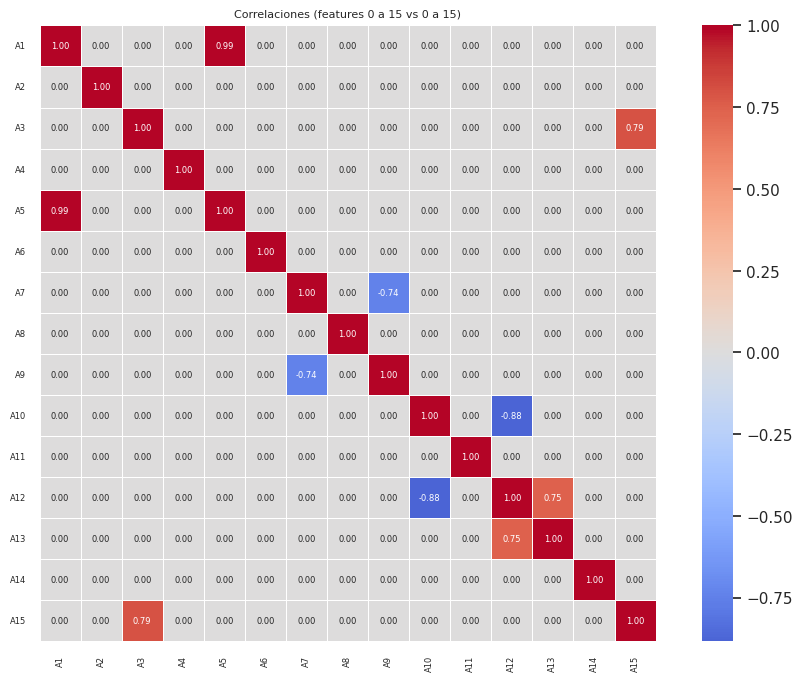

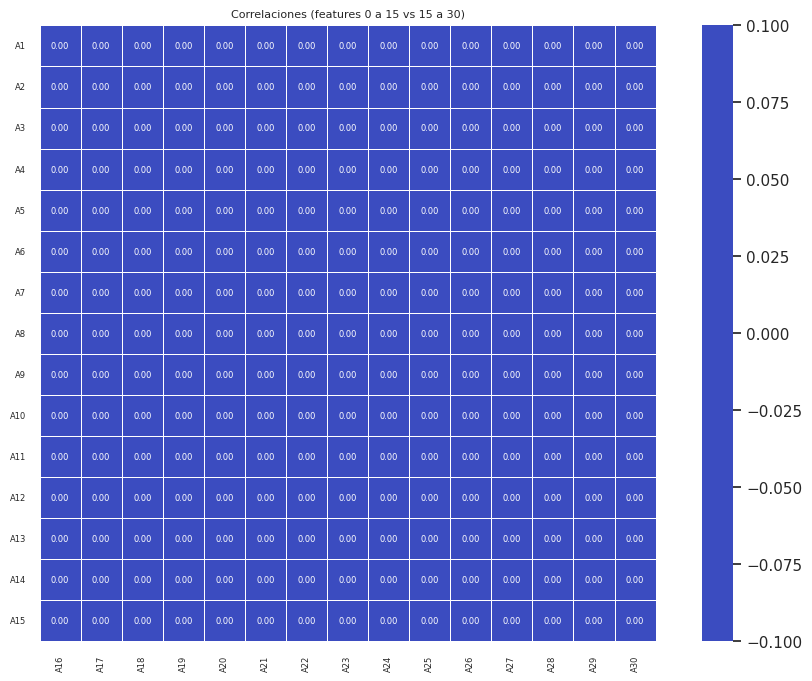

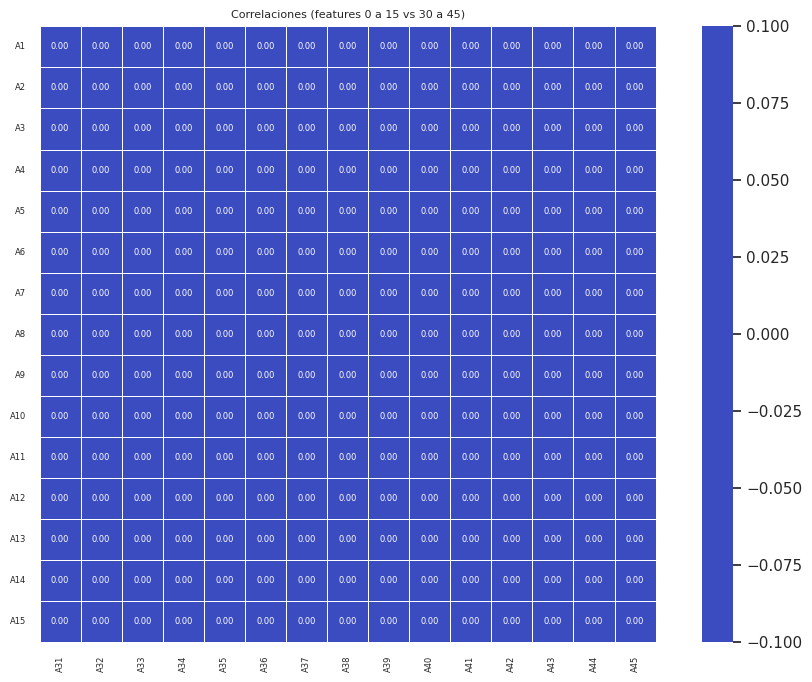

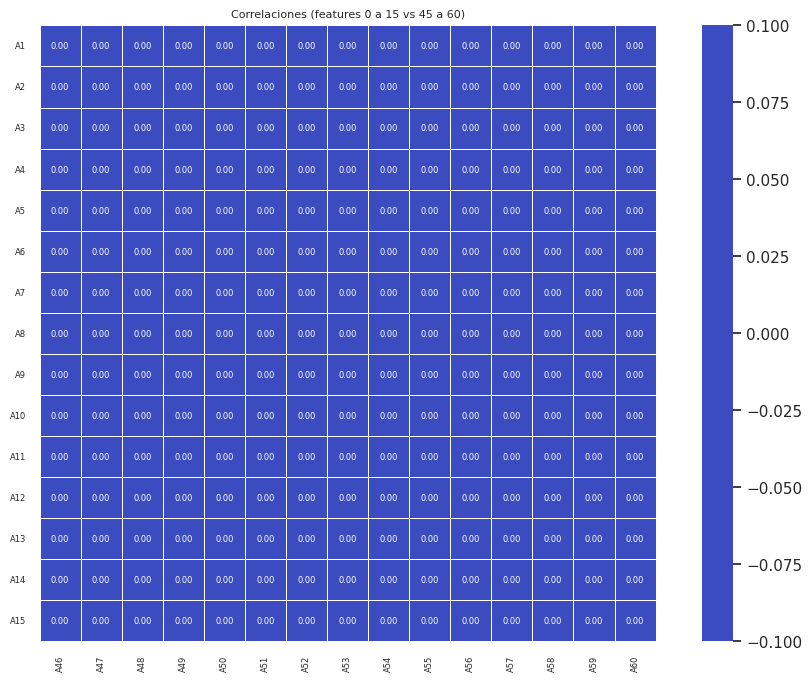

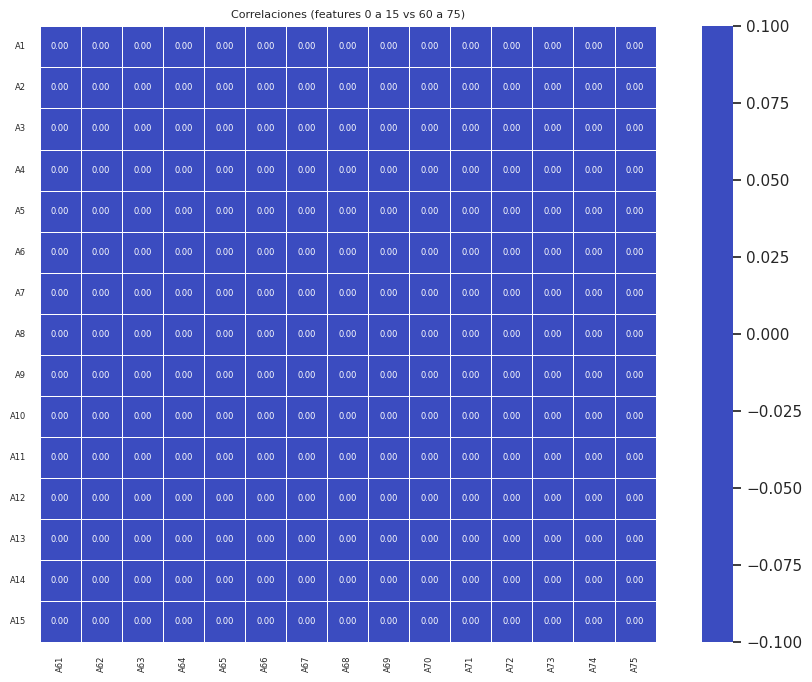

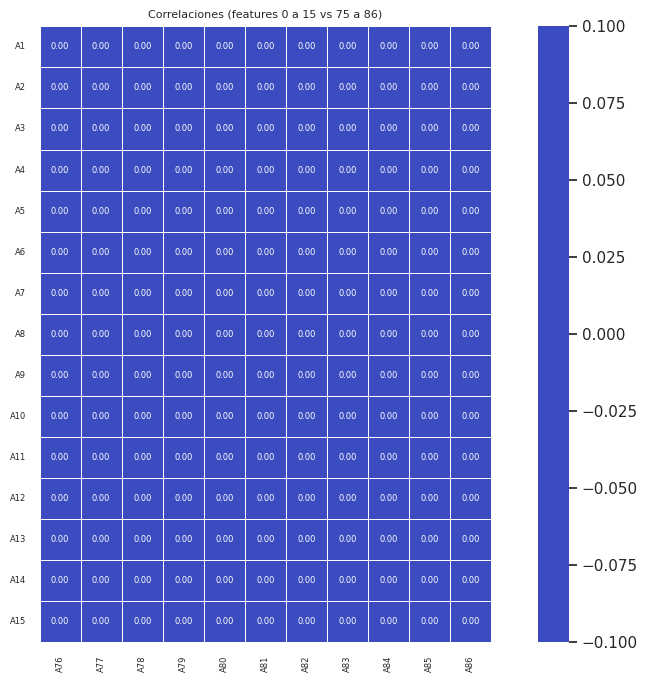

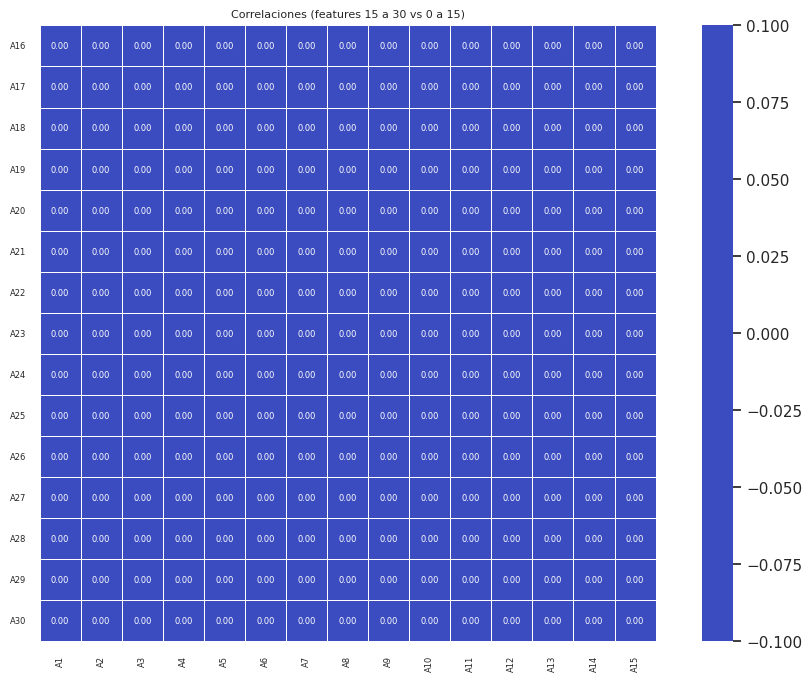

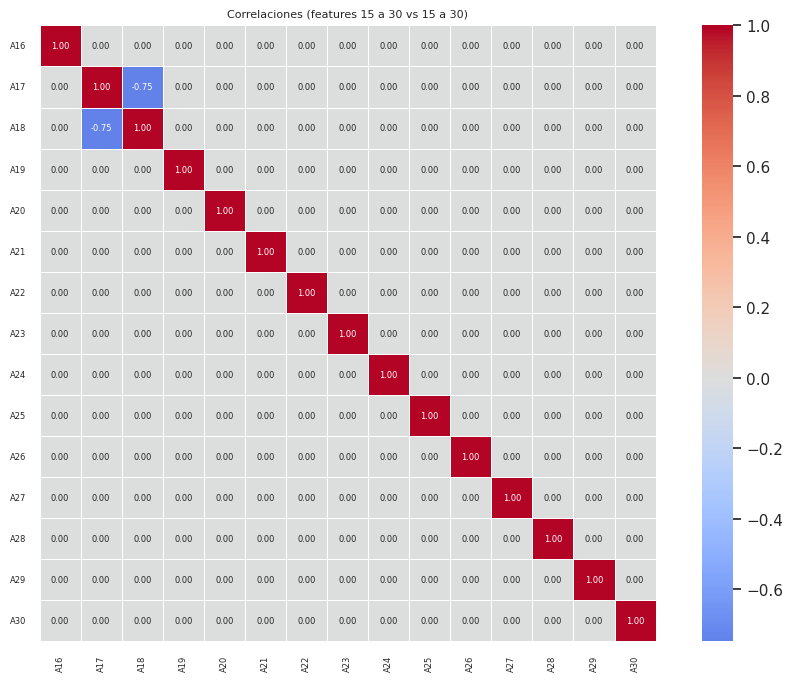

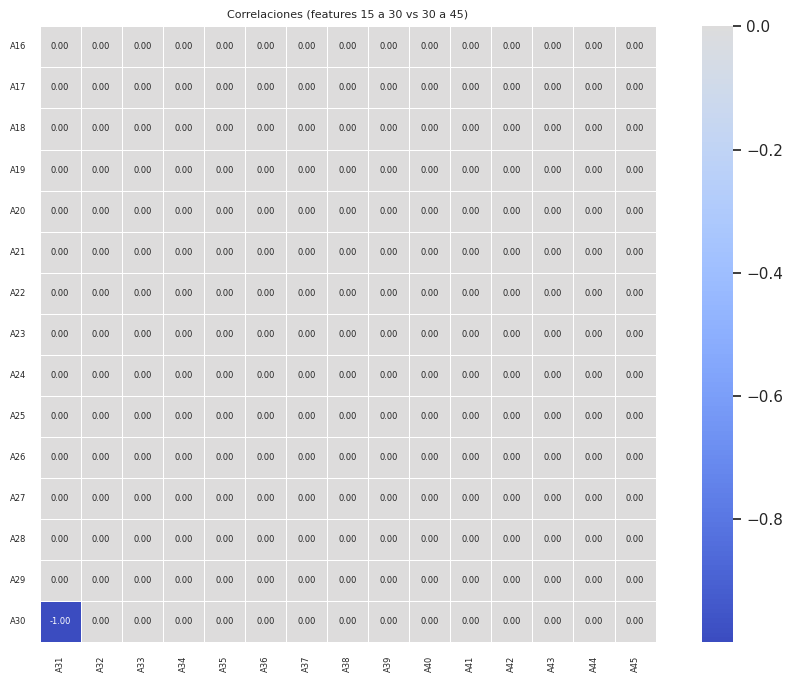

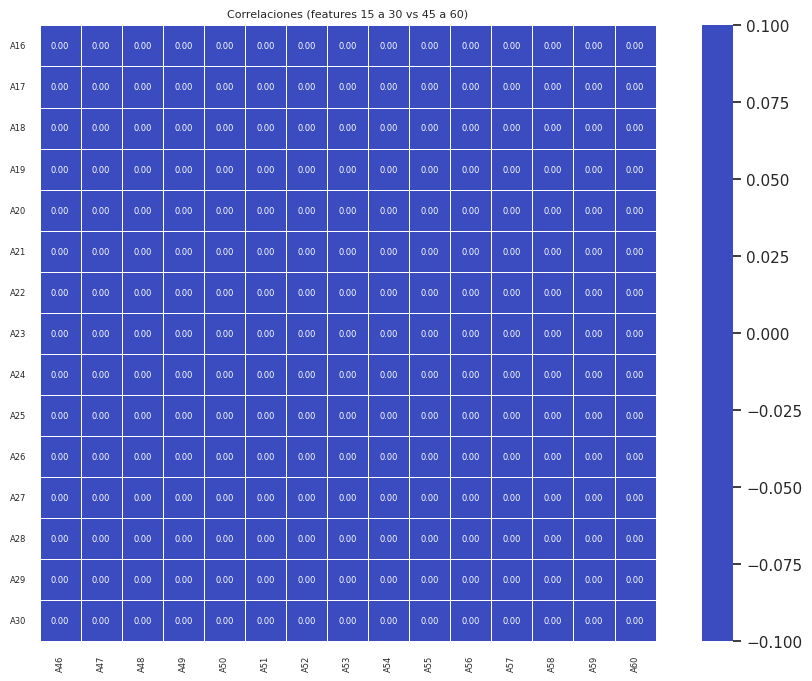

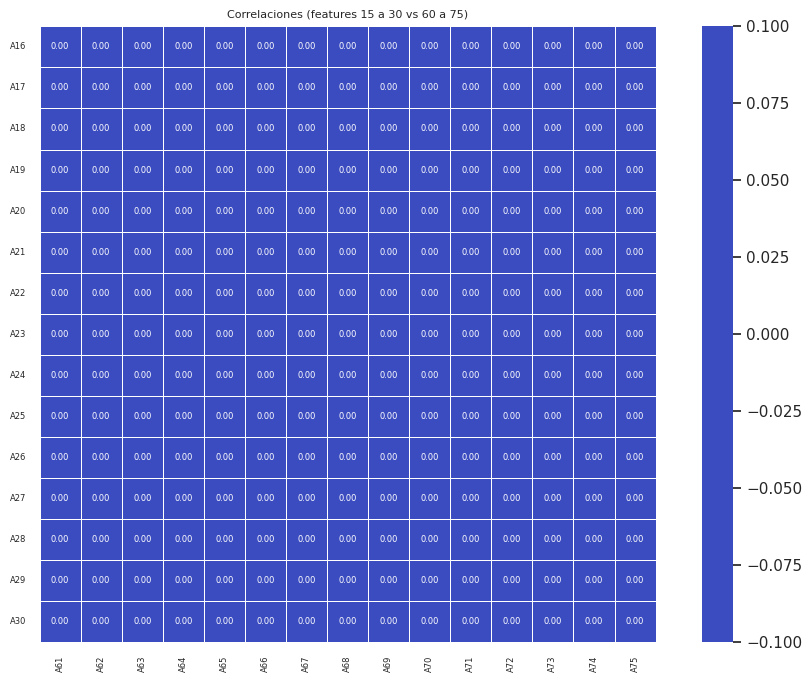

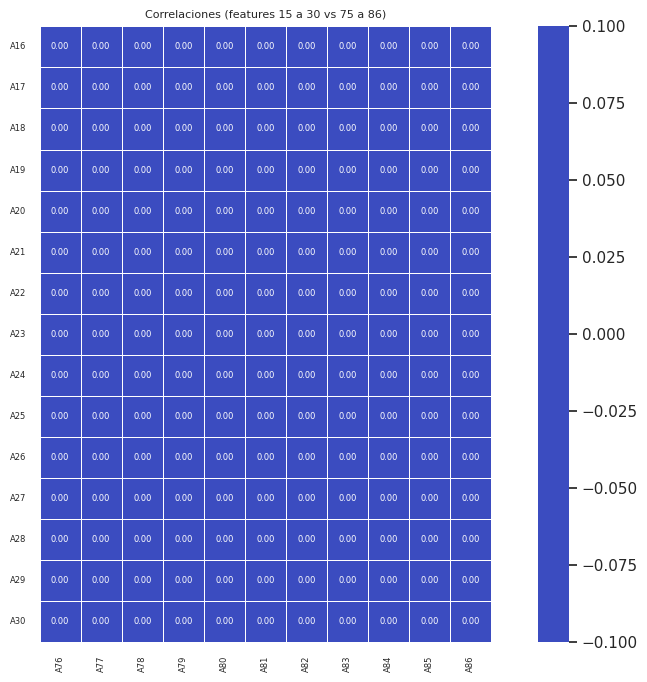

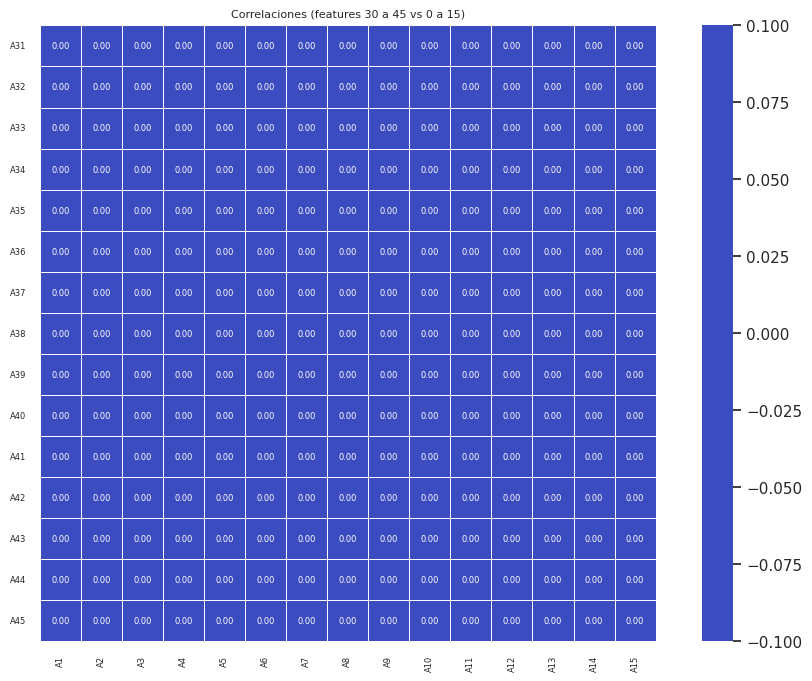

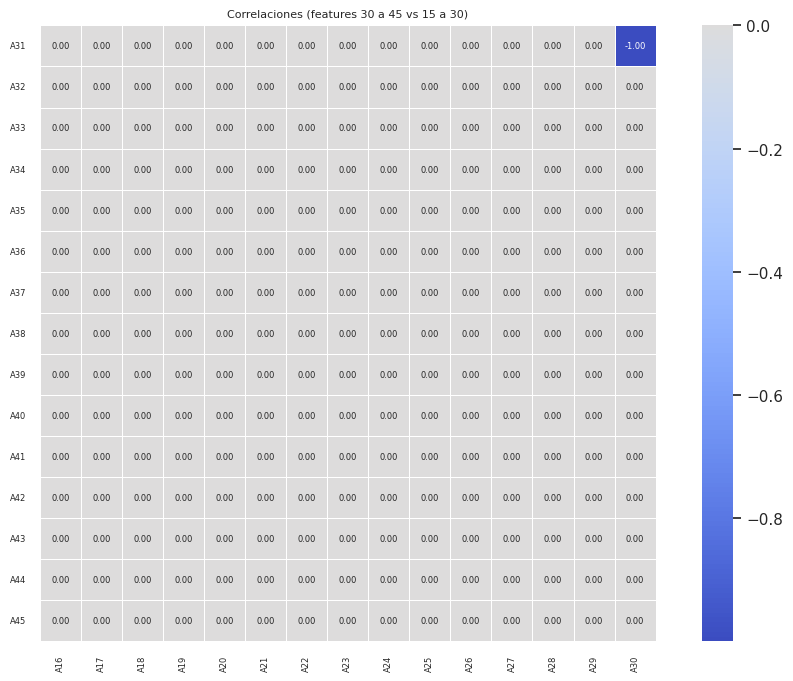

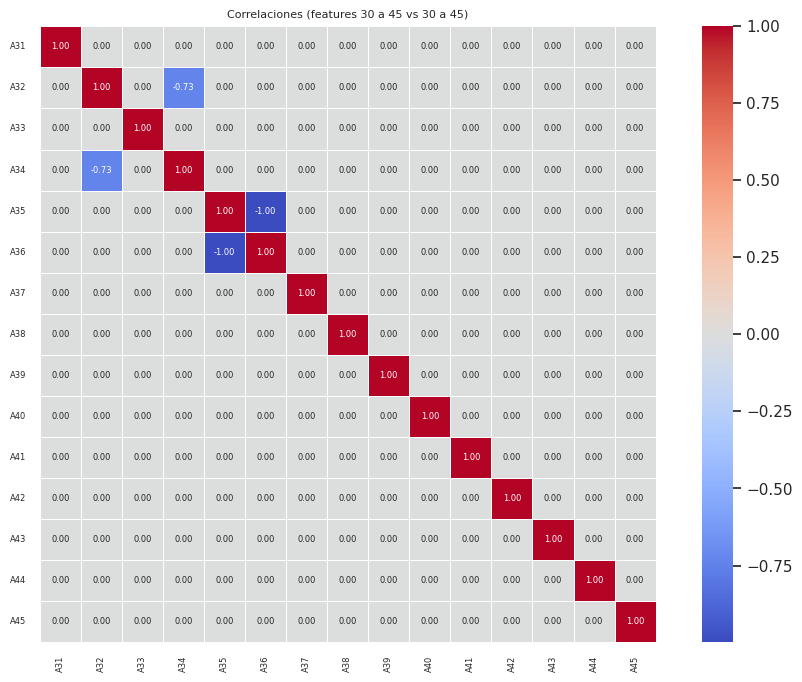

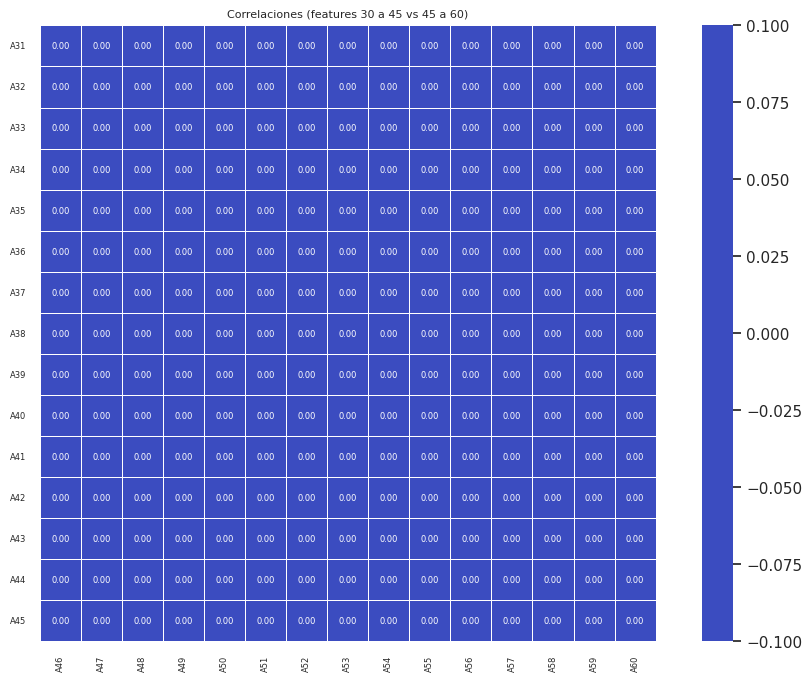

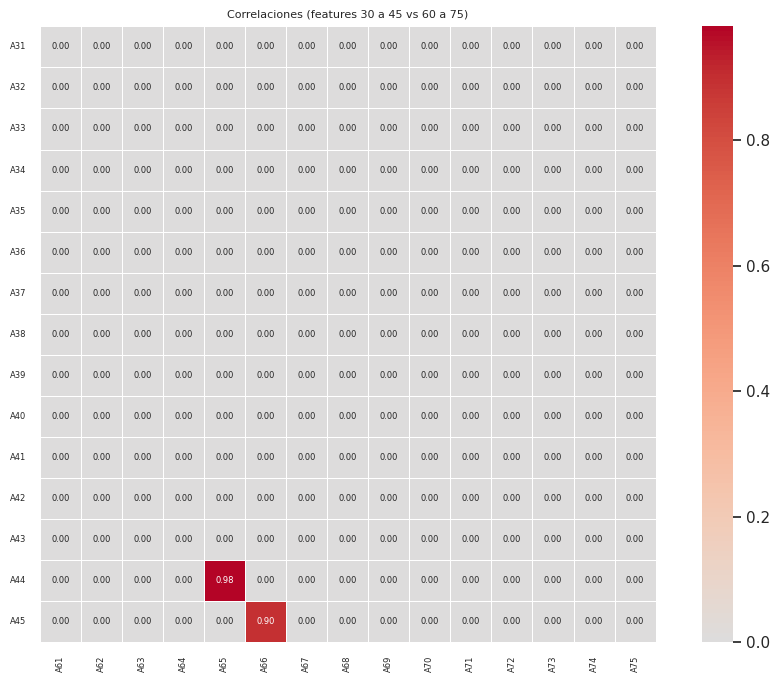

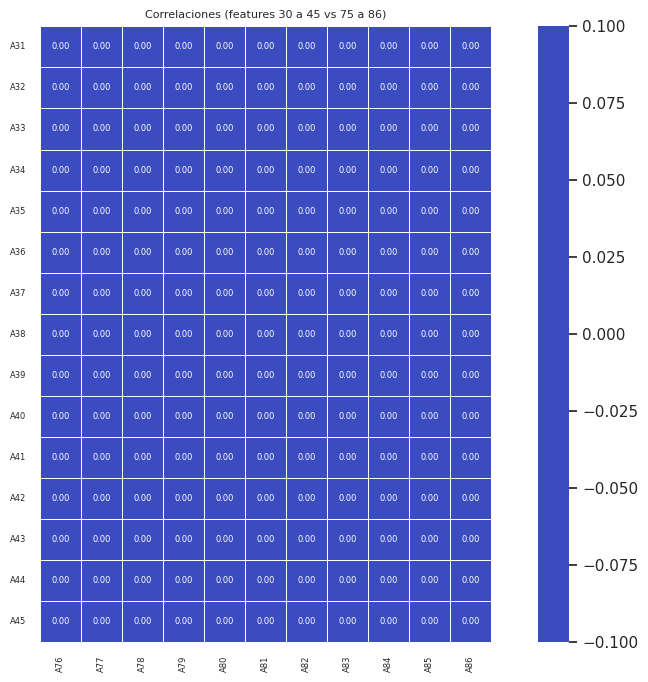

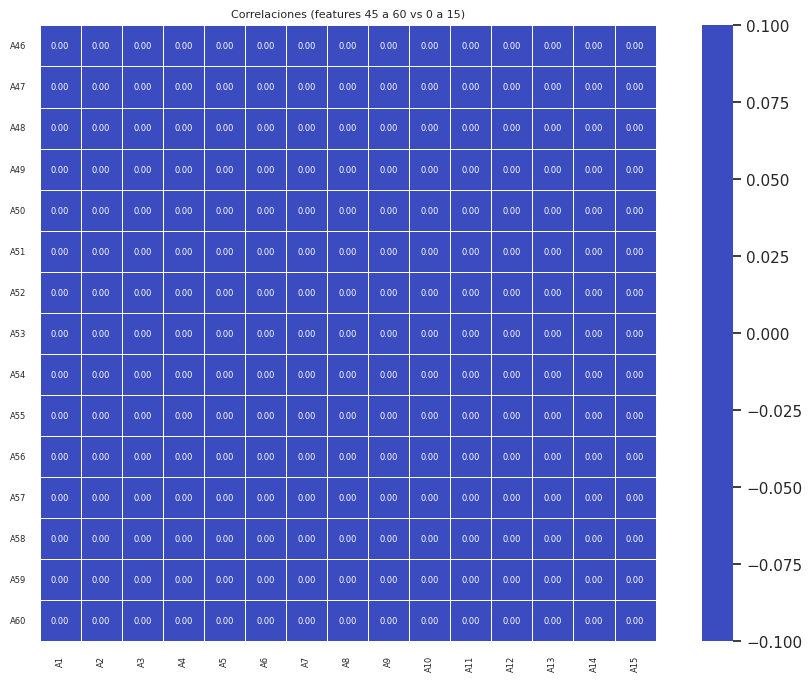

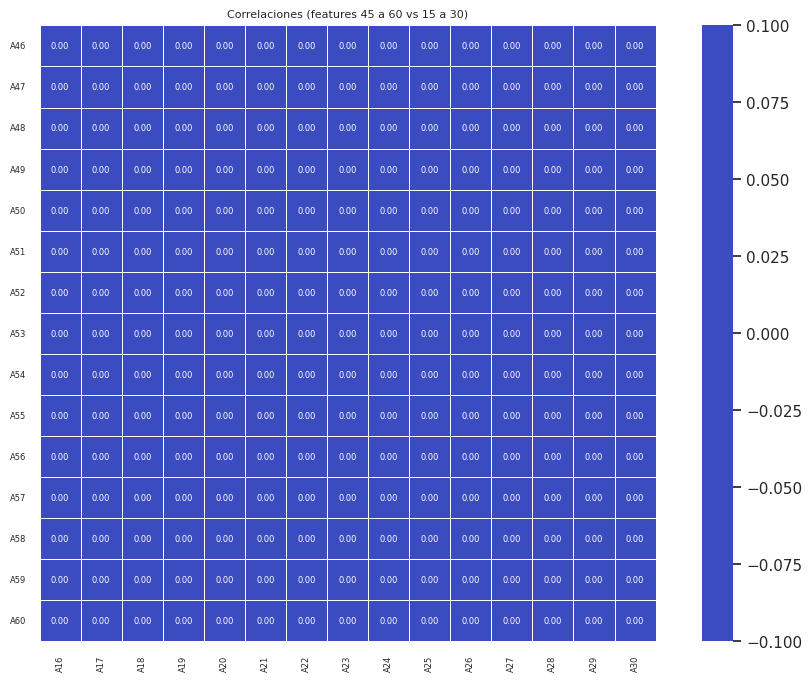

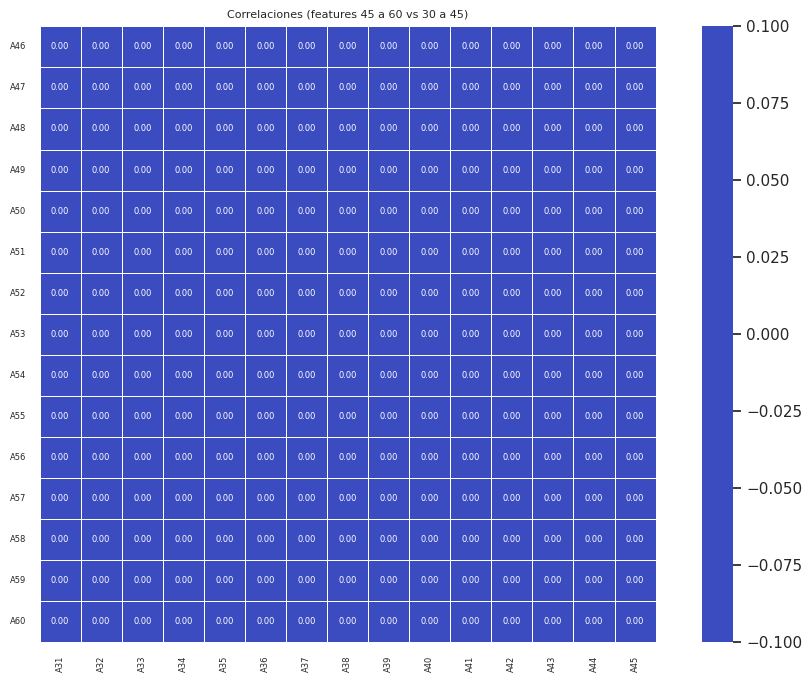

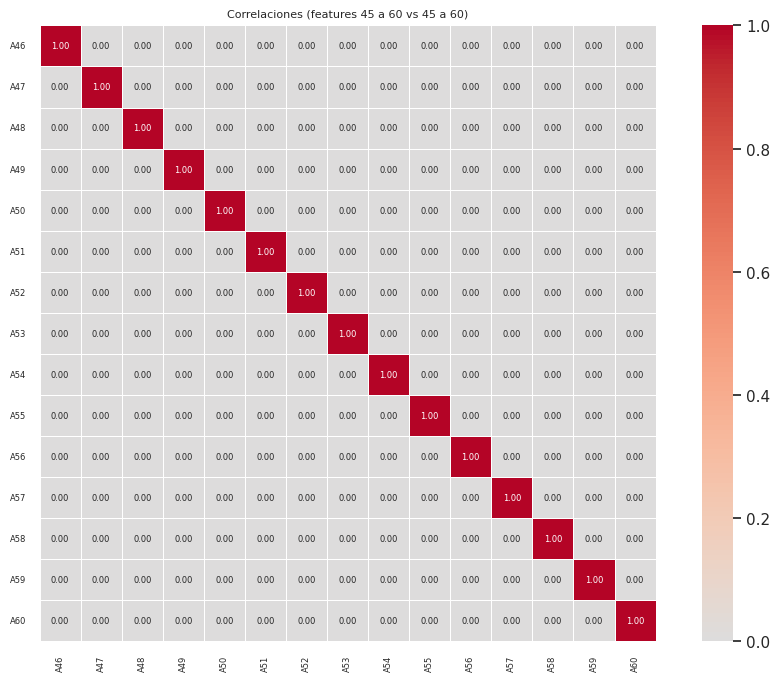

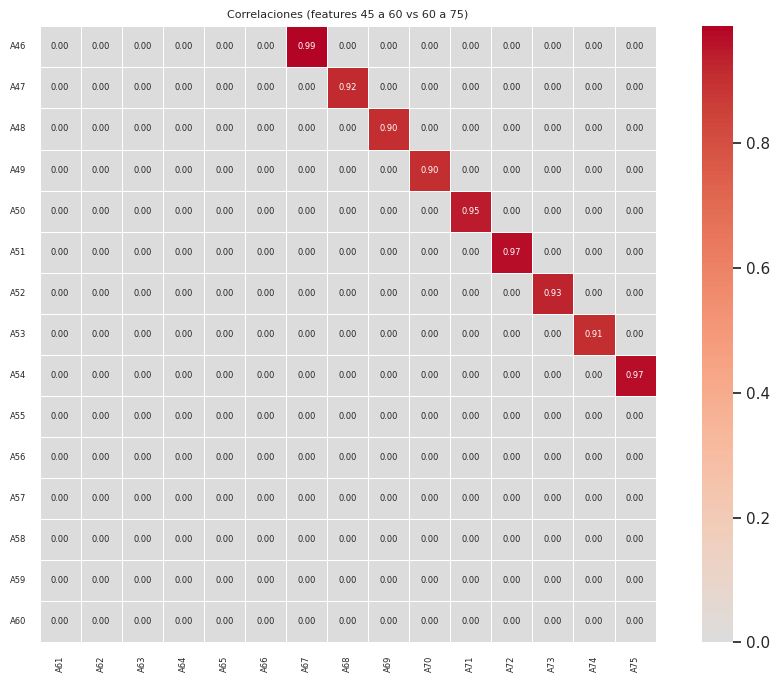

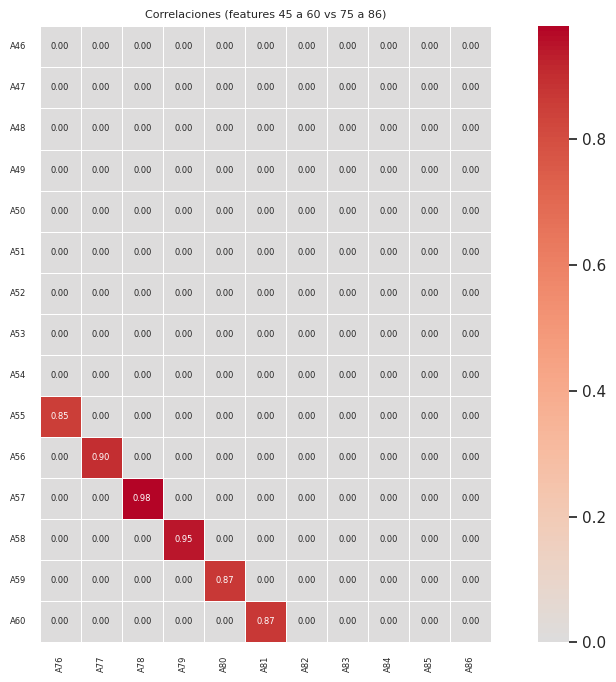

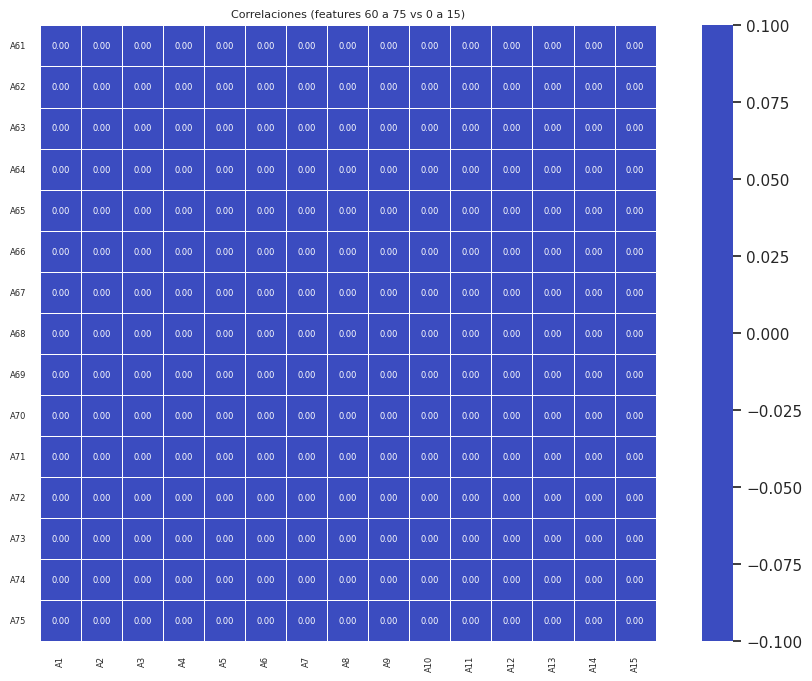

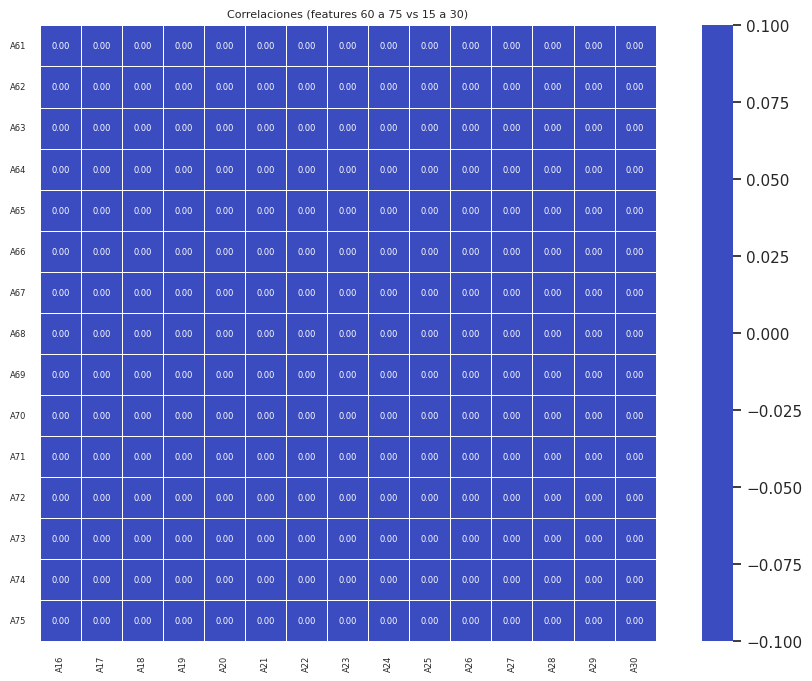

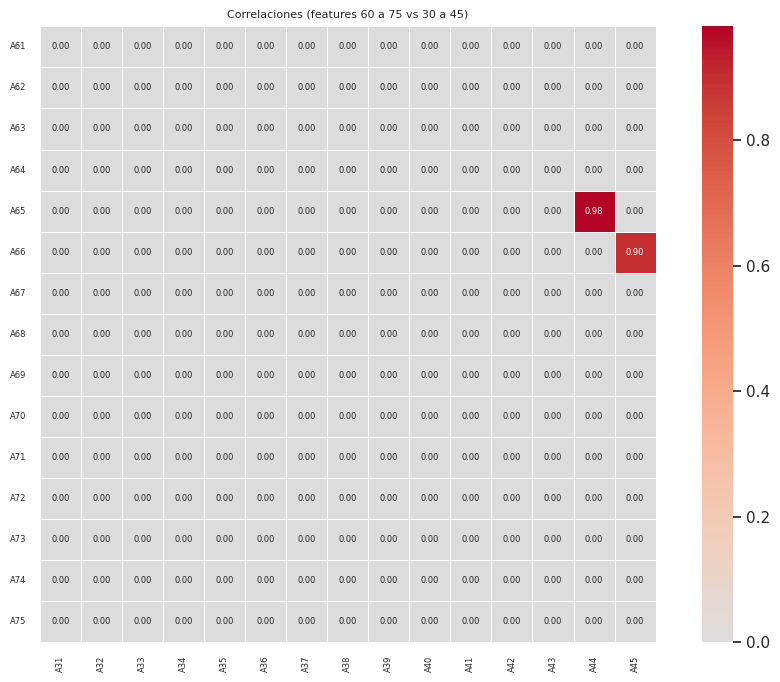

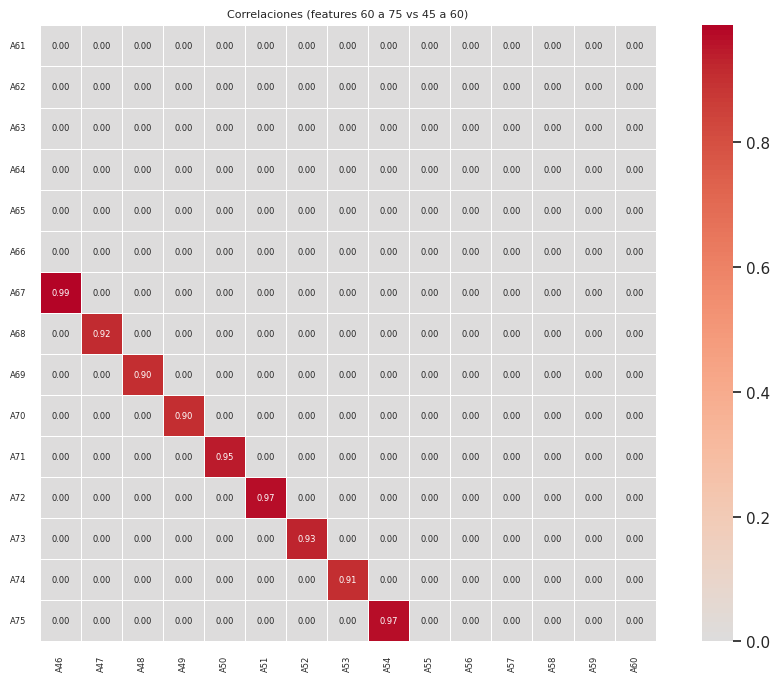

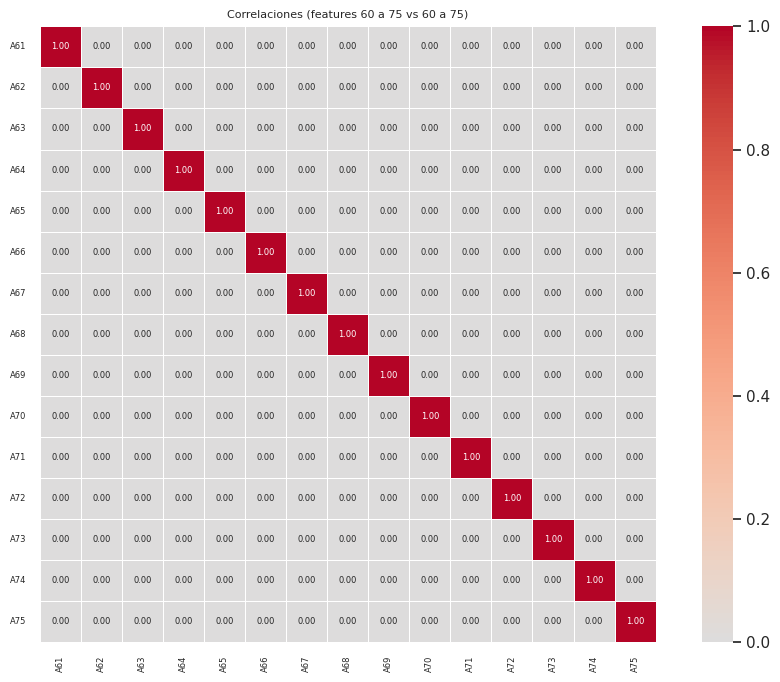

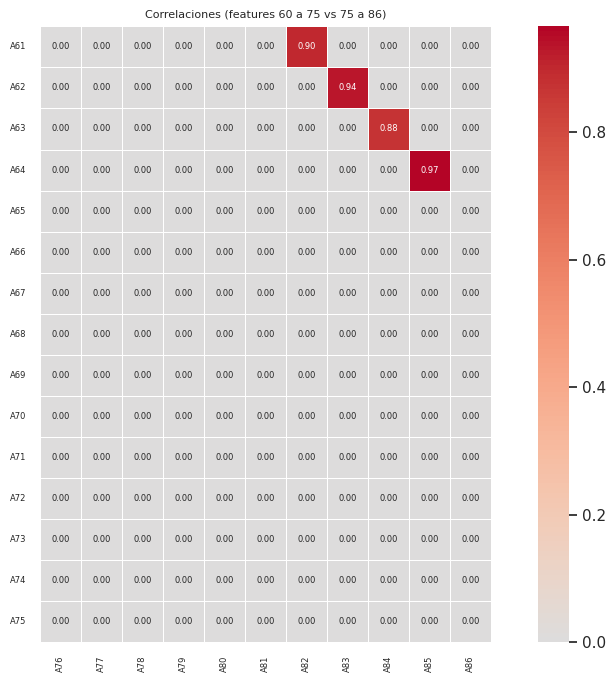

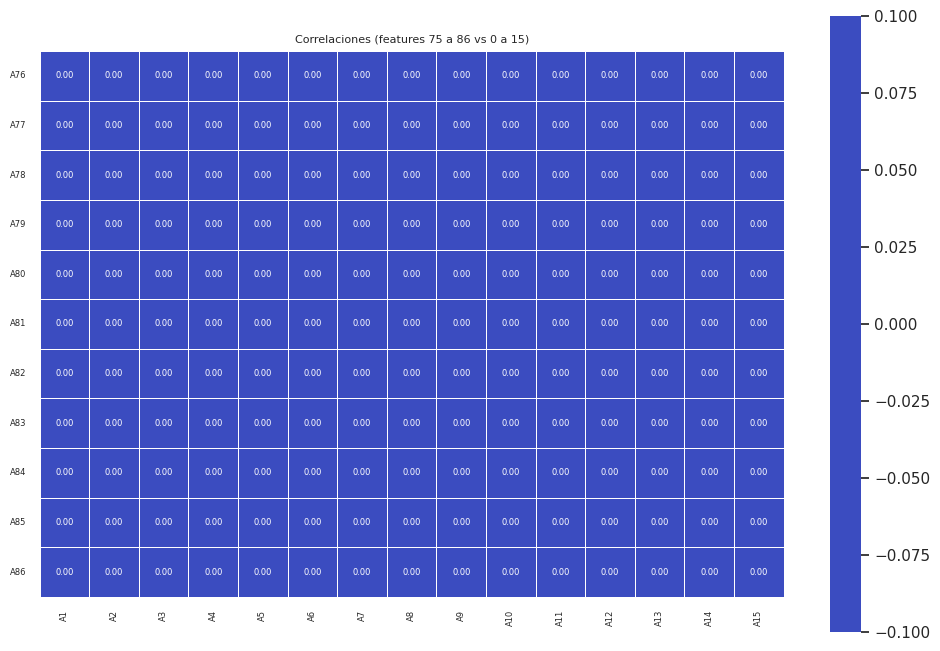

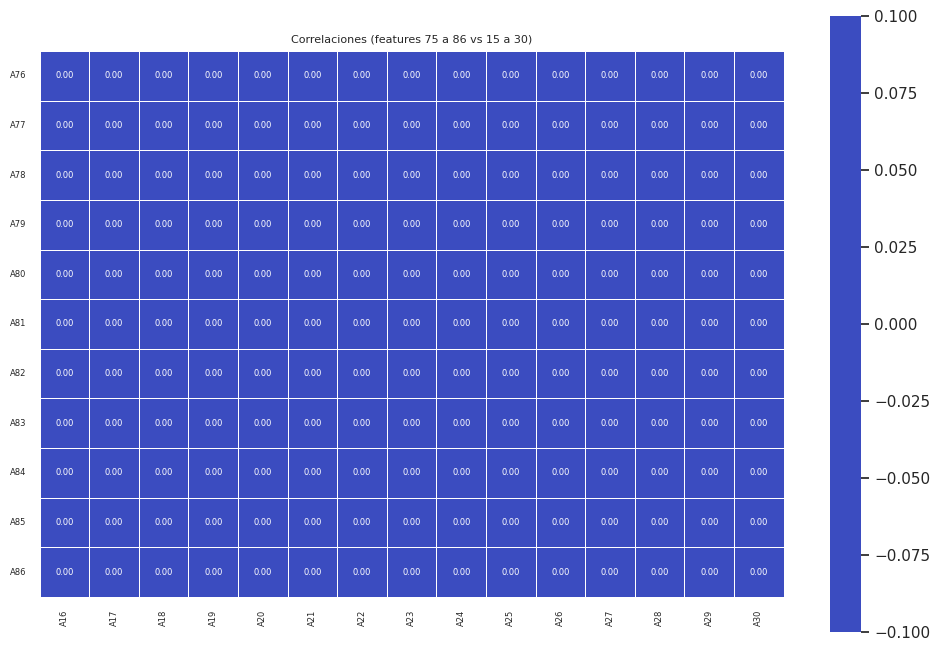

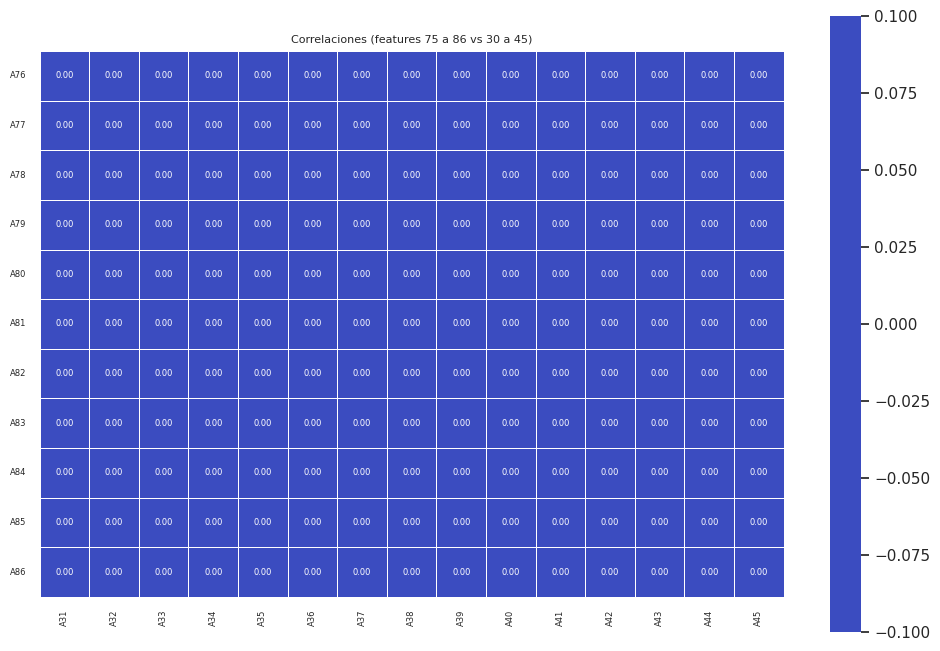

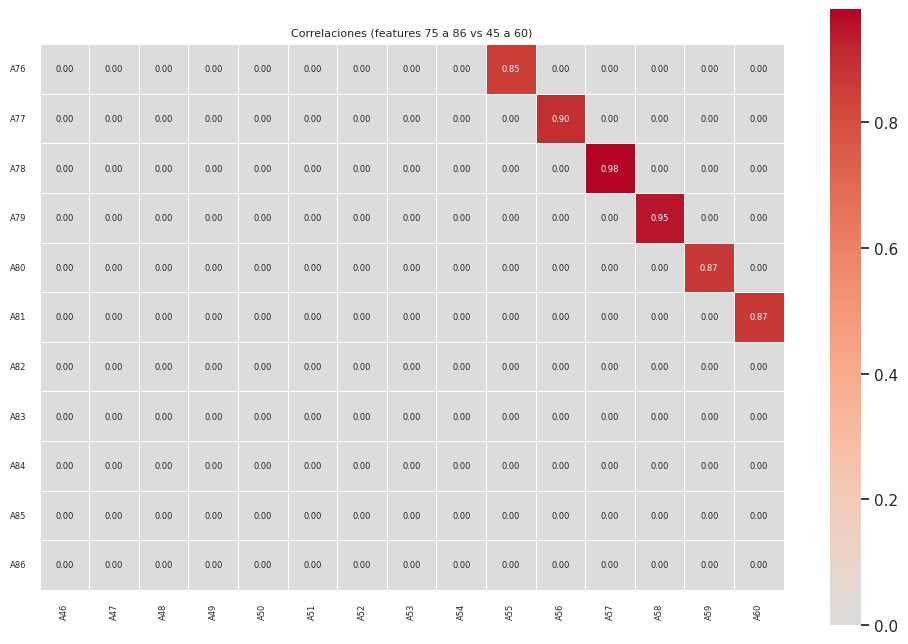

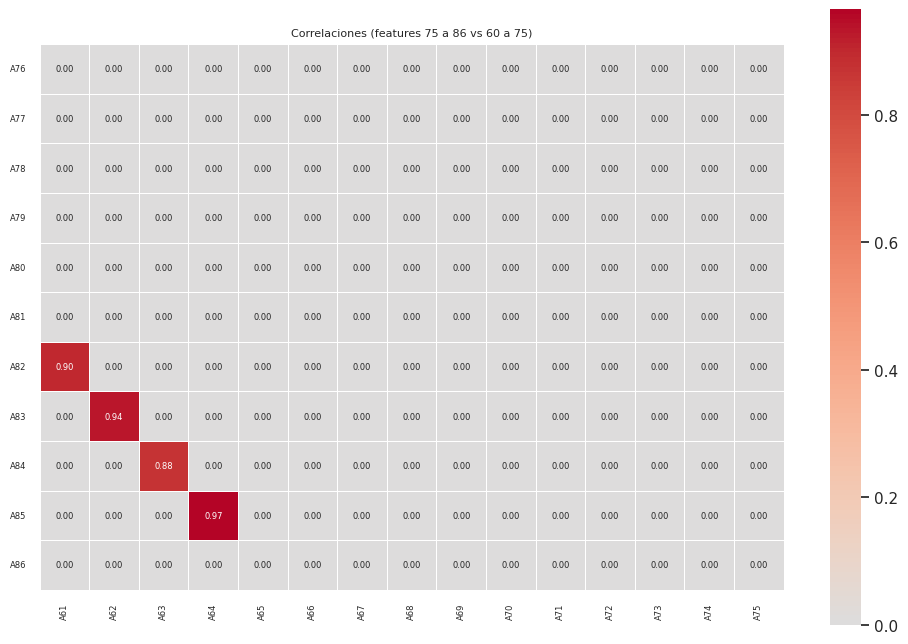

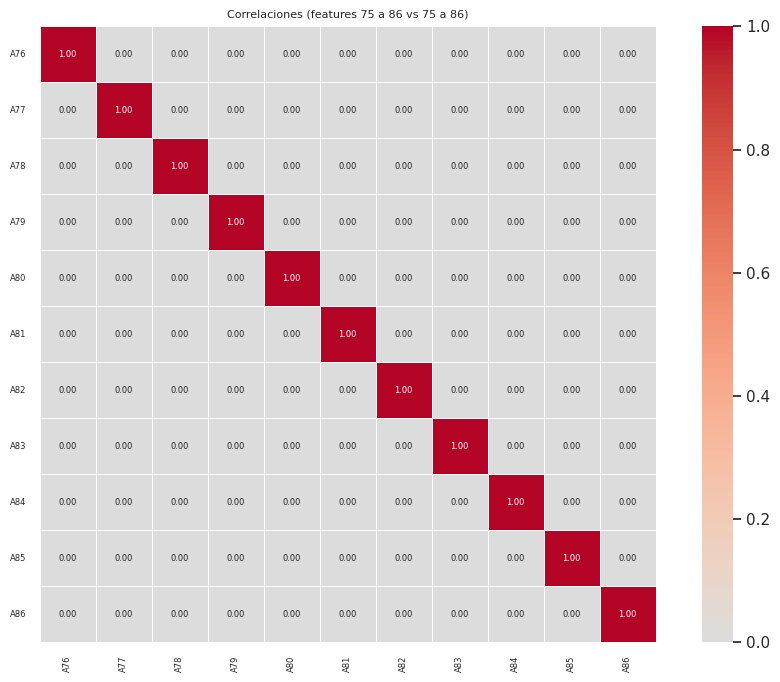

In [12]:
# Configuración
chunk_size = 15   # Número de features por bloque
threshold = 0.7   # Mostrar solo correlaciones |r| >= threshold
font_size = 6     # Tamaño de letra

# Calcular correlación
corr = df[num_cols].corr()

# Filtrar correlaciones débiles
def filter_corr(matrix, thresh):
    filtered = matrix.copy()
    filtered[(filtered < thresh) & (filtered > -thresh)] = 0
    return filtered

filtered_corr = filter_corr(corr, threshold)

# Generar heatmaps por bloques
num_features = len(num_cols)
for i in range(0, num_features, chunk_size):
    for j in range(0, num_features, chunk_size):
        corr_chunk = filtered_corr.iloc[i:i+chunk_size, j:j+chunk_size]
        plt.figure(figsize=(12, 8))
        sns.heatmap(
            corr_chunk, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            cbar=True, square=True, linewidths=0.5,
            annot_kws={"size": font_size}  # tamaño de letra de los valores
        )
        plt.xticks(fontsize=font_size, rotation=90)
        plt.yticks(fontsize=font_size, rotation=0)
        plt.title(f"Correlaciones (features {i} a {min(i+chunk_size, num_features)} vs {j} a {min(j+chunk_size, num_features)})", fontsize=8)
        plt.show()

**2. Separar features y target**

Distribución de CARAVAN:
A86
0.0    0.940216
1.0    0.059784
Name: proportion, dtype: float64


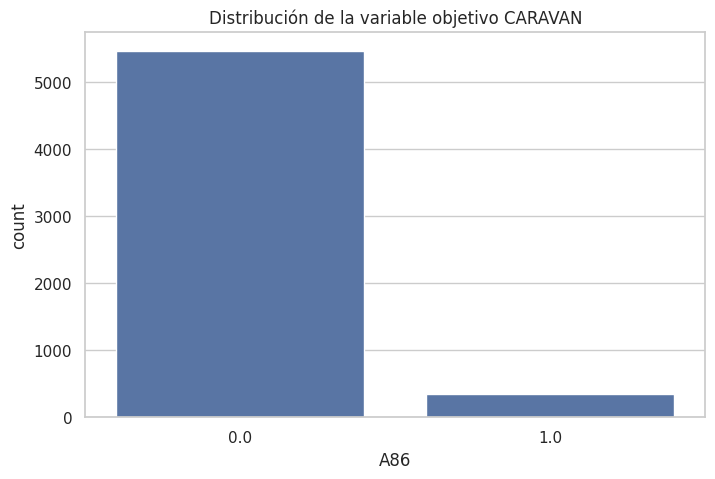

In [13]:
X = df.drop("A86", axis=1)
y = df["A86"]

# Explicación:
# Separamos las variables predictoras (X) de la variable objetivo (y) para entrenar modelos supervisados.
# CARAVAN es altamente desbalanceada (~6% positivos), por lo que debemos tener cuidado en la validación y métricas.
print("Distribución de CARAVAN:")
print(y.value_counts(normalize=True))

#ME PARECE QEU DEBEMOS ELIMINAR LA PRIMERA FILA

sns.countplot(x=y)
plt.title("Distribución de la variable objetivo CARAVAN")
plt.show()

2.1 Correlacion entre caraterísticas y variable objetivo

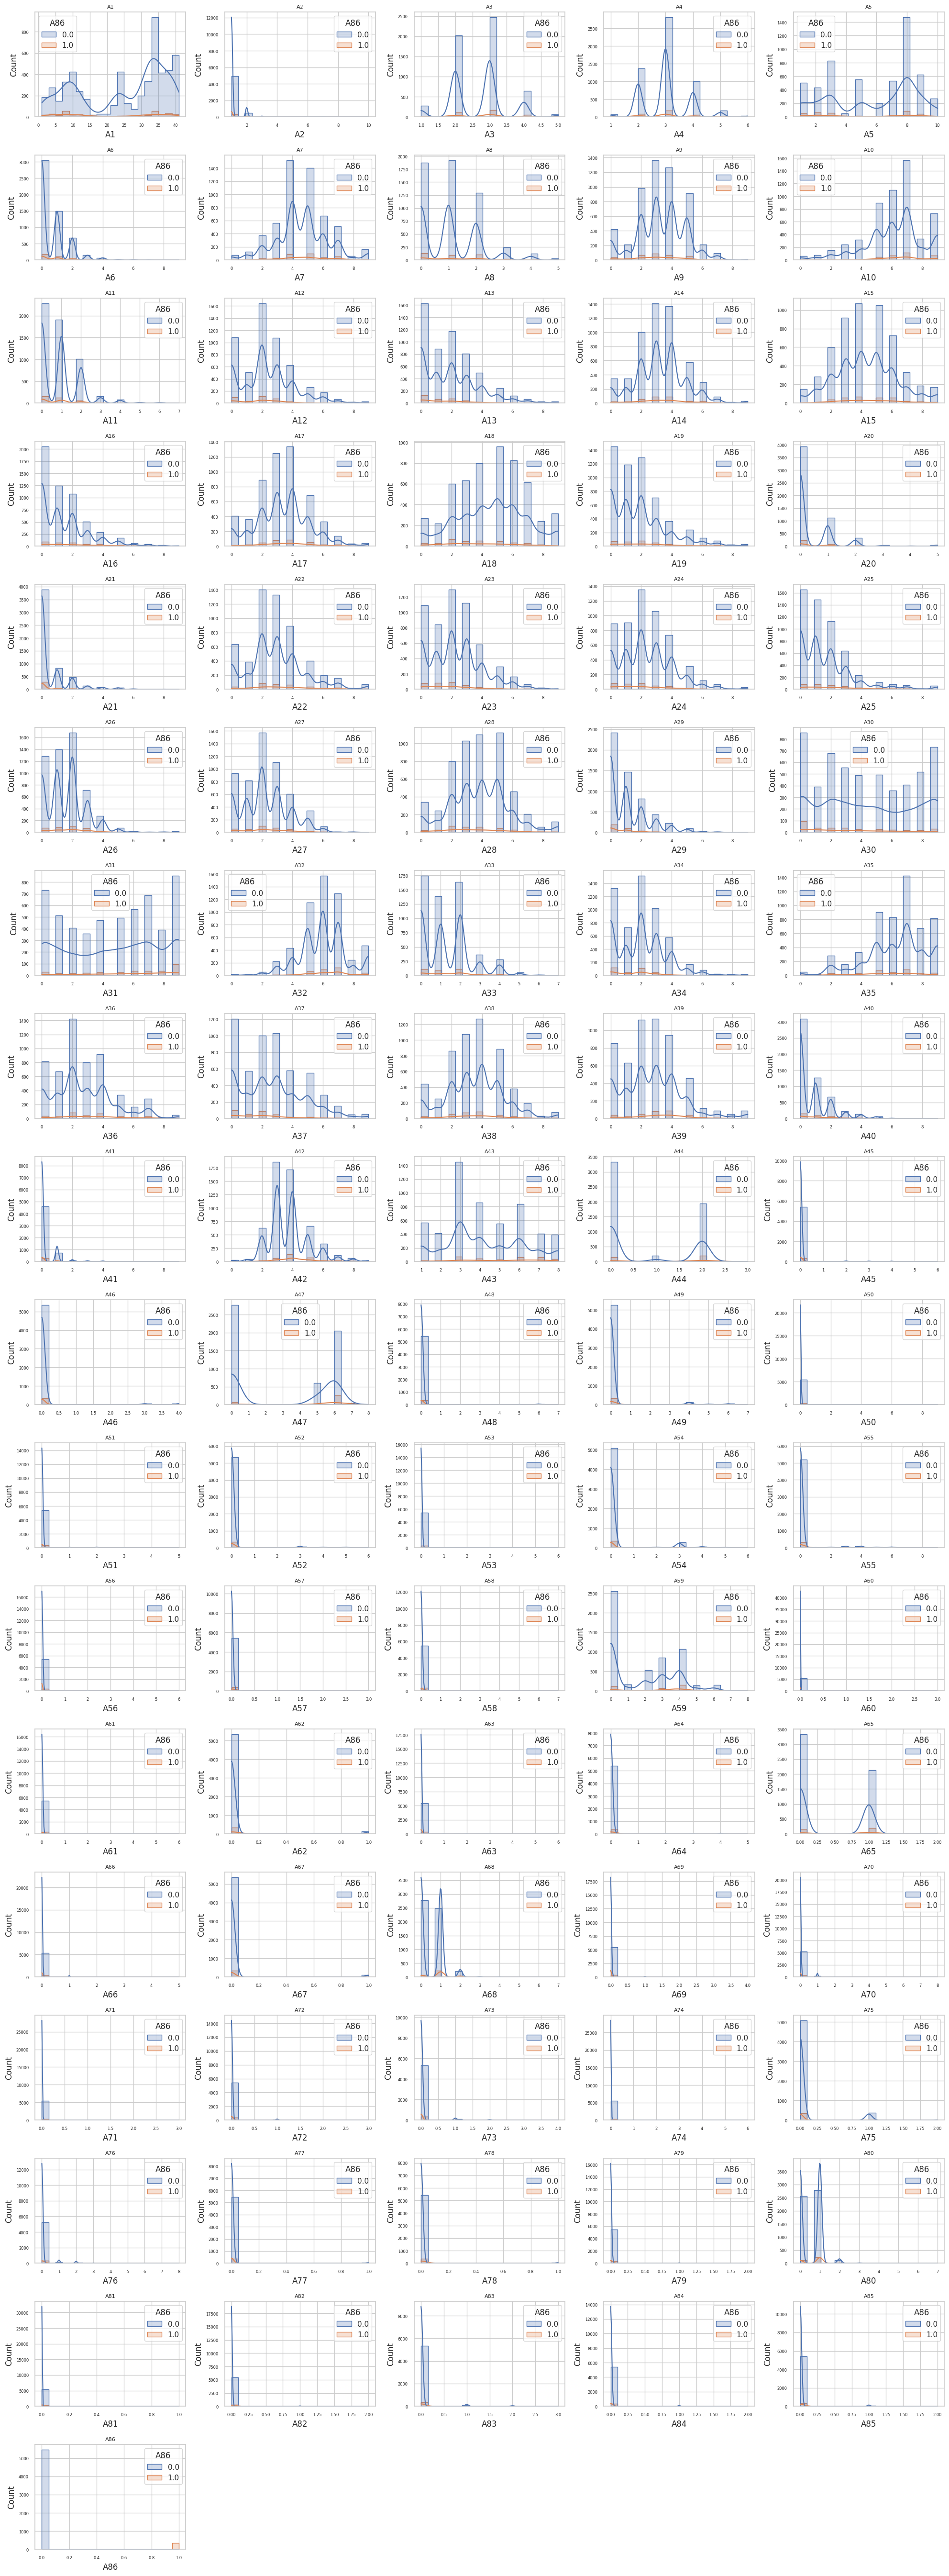

In [14]:
#for col in num_cols:
    #sns.scatterplot(x=col, y="A86", data=df)
    #plt.title(f"Relación entre {col} y CARAVAN")
    #plt.show()
    #sns.histplot(data=df, x=col, hue=y, bins=20, kde=True, element="step")
    #plt.title(f"Distribución de {col} según CARAVAN")
    #plt.show()

# Configuración de la cuadrícula
cols = 5  # número de columnas por fila
rows = math.ceil(len(num_cols) / cols)  # calcular número de filas necesarias
fig, axes = plt.subplots(rows, cols, figsize=(20, rows*3))  # tamaño total de la figura
axes = axes.flatten()  # aplanar el array de axes para iterar fácilmente

# Tamaño de letra pequeño
title_size = 8
label_size = 6

# Graficar cada feature
for i, col in enumerate(num_cols):
    sns.histplot(
        data=df, x=col, hue=y, bins=20, kde=True, element="step",
        ax=axes[i]
    )
    axes[i].set_title(f"{col}", fontsize=title_size)
    axes[i].tick_params(axis='x', labelsize=label_size)
    axes[i].tick_params(axis='y', labelsize=label_size)

# Eliminar subplots vacíos (si los hay)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**3. Identificación de variables categóricas**

In [15]:
# Muchas variables son categorías codificadas numéricamente (ej. MOSTYPE, APERSAUT).
# Aplicar OneHotEncoder ayuda a que modelos lineales o basados en distancias puedan interpretarlas correctamente.
categorical_features = [f"A{i}" for i in range(1, 44)]  # sociodemográficas
categorical_features += [f"A{i}" for i in range(44, 86)]  # productos de seguros

# Ejemplo de algunas variables relevantes
print("Ejemplo de columnas sociodemográficas y de productos:")
print(df[["A1", "A2", "A43", "A44", "A85"]].head())

# Explicación:
# Convertimos estas variables en binarias (dummy) para que la regresión logística pueda capturar relaciones entre cada categoría y la probabilidad de CARAVAN=1.

Ejemplo de columnas sociodemográficas y de productos:
   A1  A2  A43  A44  A85
1  37   1  4.0  2.0  0.0
2  37   1  4.0  2.0  0.0
3   9   1  4.0  0.0  0.0
4  40   1  3.0  0.0  0.0
5  23   1  3.0  0.0  0.0


**4. División en train y validation**

In [16]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Explicación:
# Separamos 20% de los datos para validación.
# stratify=y asegura que la proporción de positivos/negativos se mantenga en ambos conjuntos.
print("Proporción en entrenamiento:", y_train.value_counts(normalize=True))
print("Proporción en validación:", y_val.value_counts(normalize=True))
#print("Proporción en entrenamiento:", y_train.value_counts(normalize=True).to_dict())
#print("Proporción en validación:", y_val.value_counts(normalize=True).to_dict())

Proporción en entrenamiento: A86
0.0    0.940292
1.0    0.059708
Name: proportion, dtype: float64
Proporción en validación: A86
0.0    0.939914
1.0    0.060086
Name: proportion, dtype: float64


**5. Pipeline de preprocesamiento y modelado**

In [17]:
# Preprocesamiento:
# - OneHotEncoder para variables categóricas.
# - StandardScaler opcional para modelos sensibles a escala (LogisticRegression).
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Creamos pipeline con LogisticRegression
# class_weight="balanced" ayuda a que la clase minoritaria tenga más peso en el entrenamiento.
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

# Explicación:
# La pipeline asegura que los mismos pasos de transformación se aplican a train y validation, manteniendo reproducibilidad y evitando fugas de datos.
# El preprocesamiento mejora la capacidad del modelo de capturar la relación de cada categoría con la variable objetivo.




**6. Entrenar LogisticRegression**

Classification Report - Logistic Regression Mejorado:
              precision    recall  f1-score   support

         0.0       0.96      0.80      0.87      1095
         1.0       0.12      0.41      0.18        70

    accuracy                           0.78      1165
   macro avg       0.54      0.61      0.53      1165
weighted avg       0.91      0.78      0.83      1165

ROC-AUC: 0.6638747553816048


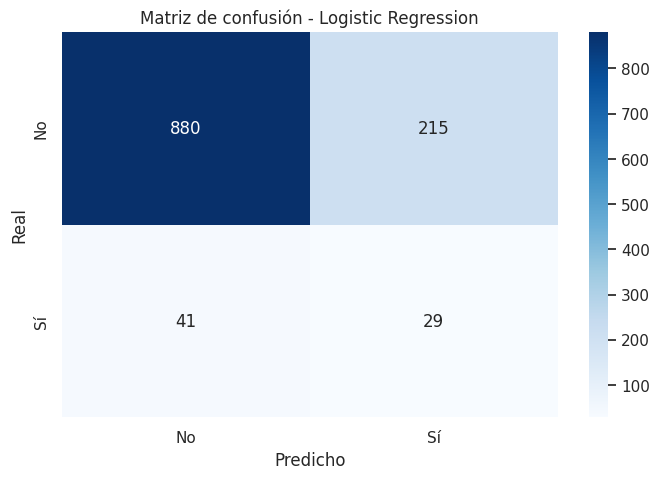

In [18]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
y_proba = pipeline.predict_proba(X_val)[:,1]

print("Classification Report - Logistic Regression Mejorado:")
print(classification_report(y_val, y_pred))

roc_auc = roc_auc_score(y_val, y_proba)
print("ROC-AUC:", roc_auc)

# Matriz de confusión
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión - Logistic Regression")
plt.show()

**7. Evaluación de métricas**

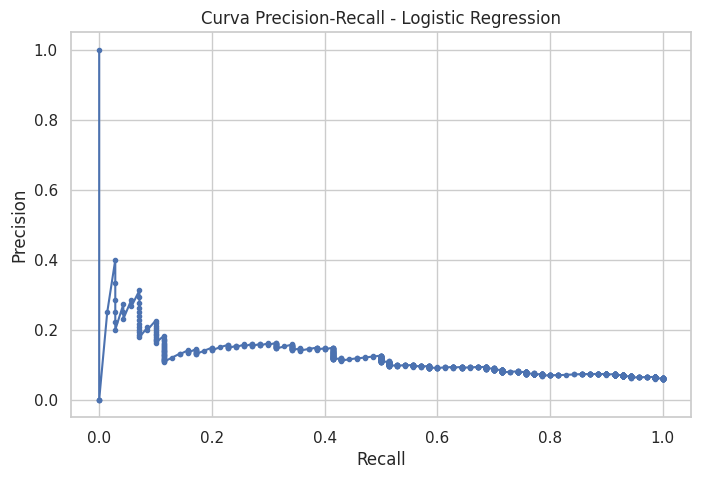

In [19]:
# Gráfico Precision-Recall para evaluar desempeño en clase minoritaria
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_val, y_proba)
plt.plot(recall, precision, marker=".")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall - Logistic Regression")
plt.show()

# Explicación:
# La curva Precision-Recall ayuda a entender el trade-off entre recuperar más positivos (recall)
# y cometer menos falsos positivos (precision).
# Muy relevante en este dataset porque la clase positiva es muy pequeña.

8. Baseline DummyClassifier

In [20]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_dummy_pred = dummy.predict(X_val)

print("Classification Report - DummyClassifier:")
print(classification_report(y_val, y_dummy_pred))

# Explicación:
# DummyClassifier sirve como benchmark para medir si el modelo entrenado realmente aporta valor sobre la estrategia trivial de predecir siempre la clase mayoritaria.


Classification Report - DummyClassifier:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1095
         1.0       0.00      0.00      0.00        70

    accuracy                           0.94      1165
   macro avg       0.47      0.50      0.48      1165
weighted avg       0.88      0.94      0.91      1165



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 **9. Exploración adicional de atributos**


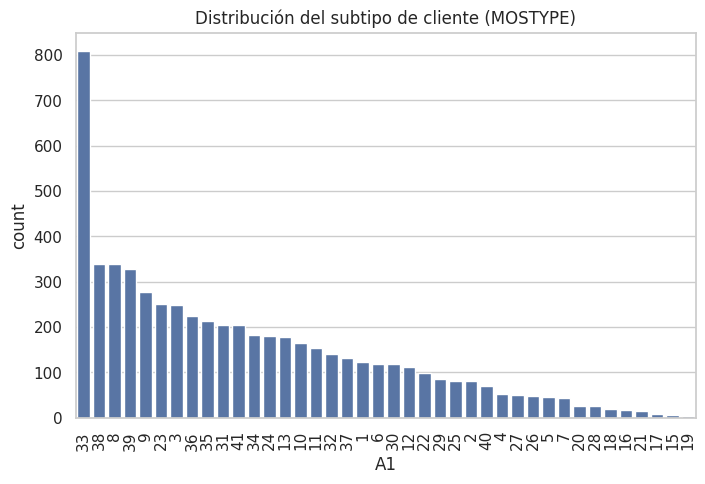

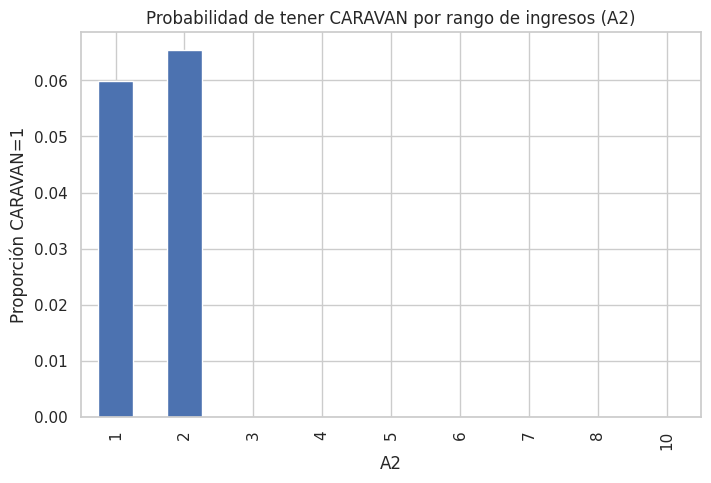

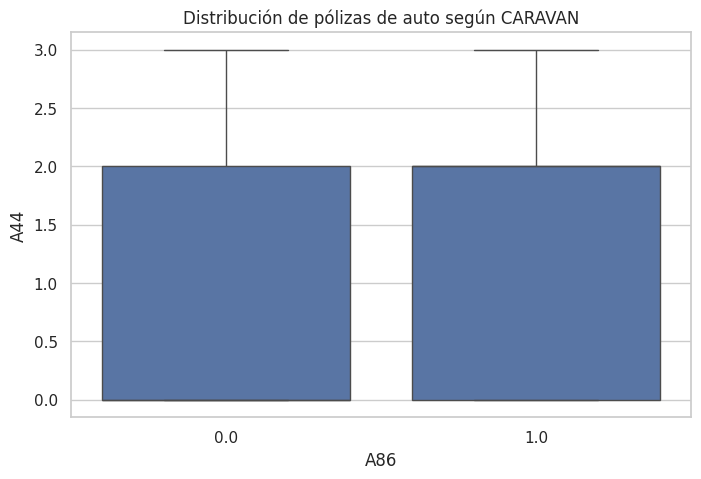

In [21]:
# Ejemplo: distribución del subtipo de cliente (A1 = MOSTYPE)
sns.countplot(x=X["A1"], order=X["A1"].value_counts().index)
plt.title("Distribución del subtipo de cliente (MOSTYPE)")
plt.xticks(rotation=90)
plt.show()

# Relación de ingresos (ej. A2 = rango de ingresos) con la variable CARAVAN
income_caravan = df.groupby("A2")["A86"].mean()
income_caravan.plot(kind="bar")
plt.title("Probabilidad de tener CARAVAN por rango de ingresos (A2)")
plt.ylabel("Proporción CARAVAN=1")
plt.show()

# Ejemplo: número de pólizas de auto (A44 = APERSAUT)
sns.boxplot(x=y, y=X["A44"])
plt.title("Distribución de pólizas de auto según CARAVAN")
plt.show()

# Explicación:
# Estas visualizaciones permiten al área de negocio entender qué segmentos de clientes
# (subtipos, ingresos, otros productos contratados) tienen mayor propensión a adquirir
# la póliza de casa rodante. Sirve para planear campañas de marketing dirigidas.